In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Event 3.csv", skiprows=[0,1,2,4])

df

,Time,C_CTWE5_A,C_CTWE5_B,C_CTWE5_C,C_CTWE5_N,V_PTWE4_AN,V_PTWE4_BN,V_PTWE4_CN,C_CTWE1_A,C_CTWE1_B,...,V_PT_FDR32_CN,C_CT_FDR32_A,C_CT_FDR32_B,C_CT_FDR32_C,V_PT_FDR12_AN,V_PT_FDR12_BN,V_PT_FDR12_CN,C_CT_FDR12_A,C_CT_FDR12_B,C_CT_FDR12_C
0,0,-0.00433,-0.00151,-0.00162,-0.000095,0.0451,0.0673,-0.245,-0.00055,0.00031,...,-0.0233,-0.000081,0.000039,0.000175,-0.0811,0.134,-0.0558,-0.0013,0.000744,0.00124
1,208,-0.00433,-0.00151,-0.00162,-0.000095,0.0451,0.0673,-0.245,-0.00055,0.00031,...,-0.0233,-0.000081,0.000039,0.000175,-0.0811,0.134,-0.0558,-0.0013,0.000744,0.00124
2,417,-2.95000,0.12900,2.90000,-0.086500,185.0000,9.0200,-192.000,-0.14800,0.07700,...,-14.1000,0.010300,-0.000550,-0.010100,21.5000,0.458,-21.4000,-0.0853,0.004690,0.08550
3,625,-59.60000,0.95300,60.30000,-1.700000,4820.0000,238.0000,-5050.000,-4.28000,2.17000,...,-1570.0000,0.698000,-0.047000,-0.680000,1770.0000,22.800,-1780.0000,-6.5300,0.265000,6.45000
4,833,-122.00000,-8.76000,132.00000,-1.750000,11400.0000,1070.0000,-12400.000,-13.10000,6.15000,...,-7040.0000,2.320000,-0.005850,-2.380000,6820.0000,40.700,-7330.0000,-30.2000,-0.263000,30.90000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96001,20000080,-107.00000,2.91000,104.00000,0.141000,10000.0000,-246.0000,-9790.000,-31.00000,23.60000,...,-7590.0000,13.300000,-6.170000,-7.110000,9710.0000,-1950.000,-7750.0000,-123.0000,34.500000,88.90000
96002,20000289,-102.00000,-6.67000,109.00000,0.151000,9570.0000,647.0000,-10200.000,-31.60000,21.70000,...,-8080.0000,13.200000,-5.220000,-7.940000,9400.0000,-1140.000,-8240.0000,-120.0000,24.600000,95.60000
96003,20000497,-96.80000,-16.20000,113.00000,0.159000,9050.0000,1540.0000,-10600.000,-32.00000,19.70000,...,-8520.0000,13.000000,-4.240000,-8.730000,9040.0000,-328.000,-8670.0000,-116.0000,14.600000,102.00000
96004,20000705,-90.60000,-25.70000,116.00000,0.167000,8470.0000,2420.0000,-10900.000,-32.20000,17.60000,...,-8910.0000,12.700000,-3.230000,-9.470000,8610.0000,491.000,-9060.0000,-112.0000,4.530000,107.00000


In [4]:
# remove first 0.25 seconds to allow system to stabilise before using data
data = df[df['Time'] > 0.25e6].iloc[:, 1:]
data

,C_CTWE5_A,C_CTWE5_B,C_CTWE5_C,C_CTWE5_N,V_PTWE4_AN,V_PTWE4_BN,V_PTWE4_CN,C_CTWE1_A,C_CTWE1_B,C_CTWE1_C,...,V_PT_FDR32_CN,C_CT_FDR32_A,C_CT_FDR32_B,C_CT_FDR32_C,V_PT_FDR12_AN,V_PT_FDR12_BN,V_PT_FDR12_CN,C_CT_FDR12_A,C_CT_FDR12_B,C_CT_FDR12_C
1201,-104.0,-3.02,107.0,0.145,9770.0,307.0,-10100.0,-30.1,21.1,9.02,...,-8230.0,13.4,-5.26,-8.12,9580.0,-1220.0,-8330.0,-86.5,19.90,66.5
1202,-99.1,-12.60,112.0,0.163,9260.0,1200.0,-10500.0,-30.6,19.2,11.30,...,-8690.0,13.2,-4.26,-8.92,9210.0,-389.0,-8780.0,-83.9,12.90,71.0
1203,-93.1,-22.20,115.0,0.181,8710.0,2090.0,-10800.0,-30.8,17.2,13.50,...,-9080.0,12.9,-3.24,-9.66,8780.0,442.0,-9180.0,-80.8,5.73,75.1
1204,-86.5,-31.60,118.0,0.196,8090.0,2970.0,-11100.0,-30.8,15.1,15.70,...,-9430.0,12.5,-2.19,-10.40,8300.0,1270.0,-9520.0,-77.3,-1.46,78.7
1205,-79.4,-40.80,120.0,0.212,7430.0,3820.0,-11300.0,-30.7,13.0,17.70,...,-9710.0,12.1,-1.14,-11.00,7770.0,2090.0,-9800.0,-73.2,-8.63,81.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96001,-107.0,2.91,104.0,0.141,10000.0,-246.0,-9790.0,-31.0,23.6,7.48,...,-7590.0,13.3,-6.17,-7.11,9710.0,-1950.0,-7750.0,-123.0,34.50,88.9
96002,-102.0,-6.67,109.0,0.151,9570.0,647.0,-10200.0,-31.6,21.7,9.91,...,-8080.0,13.2,-5.22,-7.94,9400.0,-1140.0,-8240.0,-120.0,24.60,95.6
96003,-96.8,-16.20,113.0,0.159,9050.0,1540.0,-10600.0,-32.0,19.7,12.30,...,-8520.0,13.0,-4.24,-8.73,9040.0,-328.0,-8670.0,-116.0,14.60,102.0
96004,-90.6,-25.70,116.0,0.167,8470.0,2420.0,-10900.0,-32.2,17.6,14.60,...,-8910.0,12.7,-3.23,-9.47,8610.0,491.0,-9060.0,-112.0,4.53,107.0


In [5]:
df_test = pd.read_csv("/content/drive/MyDrive/Event 4.CSV", skiprows=[0,1,2,4])

df_test


,Time,C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_A,C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_B,C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_C,C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_N,V_BUS20KV1_AN,V_BUS20KV1_BN,V_BUS20KV1_CN,C_WE919_WE910_1_WE910_A,C_WE919_WE910_1_WE910_B,...,V_2DBU17_CN,C_3DBX3_2DBU17_1_2DBU17_A,C_3DBX3_2DBU17_1_2DBU17_B,C_3DBX3_2DBU17_1_2DBU17_C,V_DBU16_AN,V_DBU16_BN,V_DBU16_CN,C_DBU15_DBU16_1_DBU16_A,C_DBU15_DBU16_1_DBU16_B,C_DBU15_DBU16_1_DBU16_C
0,0,-0.004329,-0.001515,-0.001623,-0.000095,0.04508,0.067282,-0.244665,-0.000550,0.000310,...,-0.023287,0.000081,-0.000039,-0.000175,0.006976,-0.170016,0.009497,-0.001304,0.000744,0.001239
1,208,-0.004329,-0.001515,-0.001623,-0.000095,0.04508,0.067282,-0.244665,-0.000550,0.000310,...,-0.023287,0.000081,-0.000039,-0.000175,0.006976,-0.170016,0.009497,-0.001304,0.000744,0.001239
2,417,-2.949805,0.129254,2.902578,-0.086547,185.03150,9.019005,-191.888600,-0.147661,0.077044,...,-14.103820,-0.010343,0.000550,0.010053,21.577300,0.534447,-21.554240,-0.085252,0.004687,0.085501
3,625,-59.594590,0.953098,60.338350,-1.701627,4822.05300,238.183100,-5049.003000,-4.277356,2.171564,...,-1571.959000,-0.697677,0.047035,0.680220,1767.359000,22.725030,-1783.271000,-6.532479,0.264938,6.454980
4,833,-121.711400,-8.763029,132.230300,-1.750747,11365.89000,1068.903000,-12438.870000,-13.147550,6.146612,...,-7043.420000,-2.322523,0.005846,2.382541,6816.230000,40.688840,-7326.779000,-30.226880,-0.263450,30.871960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96001,20000080,-107.363700,2.914632,104.303300,0.141372,10036.55000,-246.284100,-9789.851000,-31.042110,23.562030,...,-7589.041000,-13.282080,6.172494,7.107059,9714.433000,-1952.942000,-7746.662000,-123.451400,34.480090,88.890520
96002,20000289,-102.389100,-6.670727,108.918900,0.151196,9573.86300,647.097800,-10221.420000,-31.617610,21.703120,...,-8081.860000,-13.168070,5.220430,7.944878,9404.315000,-1143.866000,-8235.304000,-120.328600,24.622090,95.589390
96003,20000497,-96.799230,-16.229930,112.860300,0.159055,9051.57400,1536.183000,-10589.430000,-31.997740,19.709110,...,-8524.224000,-12.973920,4.237179,8.733336,9035.498000,-327.745300,-8672.682000,-116.471100,14.614240,101.690800
96004,20000705,-90.581010,-25.684520,116.101600,0.166915,8472.77400,2416.316000,-10891.430000,-32.181340,17.592980,...,-8913.785000,-12.700290,3.229803,9.466650,8610.810000,490.488500,-9056.354000,-111.891800,4.527538,107.160200


In [6]:
data_test = df_test[df_test['Time'] > 0.25e6].iloc[:, 1:]

data_test

,C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_A,C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_B,C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_C,C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_N,V_BUS20KV1_AN,V_BUS20KV1_BN,V_BUS20KV1_CN,C_WE919_WE910_1_WE910_A,C_WE919_WE910_1_WE910_B,C_WE919_WE910_1_WE910_C,...,V_2DBU17_CN,C_3DBX3_2DBU17_1_2DBU17_A,C_3DBX3_2DBU17_1_2DBU17_B,C_3DBX3_2DBU17_1_2DBU17_C,V_DBU16_AN,V_DBU16_BN,V_DBU16_CN,C_DBU15_DBU16_1_DBU16_A,C_DBU15_DBU16_1_DBU16_B,C_DBU15_DBU16_1_DBU16_C
1201,-104.45750,-3.022276,107.3242,0.145302,9766.355,306.5743,-10073.130,-30.13120,21.10978,9.022247,...,-8232.835,-13.37720,5.258677,8.115199,9578.646,-1217.1300,-8334.986,-86.45124,19.949390,66.48052
1202,-99.07707,-12.646870,111.5508,0.162985,9264.375,1202.4630,-10467.260,-30.55253,19.23790,11.314330,...,-8685.367,-13.18175,4.261304,8.916998,9209.828,-388.6814,-8784.569,-83.89921,12.879240,71.00006
1203,-93.08139,-22.179920,115.0774,0.180668,8705.442,2090.8320,-10796.350,-30.78555,17.24713,13.538670,...,-9083.925,-12.90552,3.237452,9.664098,8784.433,442.2328,-9180.040,-80.83090,5.730214,75.07913
1204,-86.50970,-31.582200,117.9038,0.196387,8092.647,2965.5940,-11058.440,-30.82910,15.14937,15.679100,...,-9426.551,-12.54914,2.193594,10.351160,8304.582,1269.9770,-9518.550,-77.26310,-1.458240,78.69476
1205,-79.41438,-40.788330,119.9912,0.212105,7430.405,3821.7370,-11252.550,-30.68199,12.95866,17.723470,...,-9710.900,-12.11459,1.135613,10.974640,7773.811,2089.6200,-9798.472,-73.22099,-8.630921,81.82396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96001,-107.36370,2.914632,104.3033,0.141372,10036.550,-246.2841,-9789.851,-31.04211,23.56203,7.479362,...,-7589.041,-13.28208,6.172494,7.107059,9714.433,-1952.9420,-7746.662,-123.45140,34.480090,88.89052
96002,-102.38910,-6.670727,108.9189,0.151196,9573.863,647.0978,-10221.420,-31.61761,21.70312,9.914006,...,-8081.860,-13.16807,5.220430,7.944878,9404.315,-1143.8660,-8235.304,-120.32860,24.622090,95.58939
96003,-96.79923,-16.229930,112.8603,0.159055,9051.574,1536.1830,-10589.430,-31.99774,19.70911,12.289000,...,-8524.224,-12.97392,4.237179,8.733336,9035.498,-327.7453,-8672.682,-116.47110,14.614240,101.69080
96004,-90.58101,-25.684520,116.1016,0.166915,8472.774,2416.3160,-10891.430,-32.18134,17.59298,14.588160,...,-8913.785,-12.70029,3.229803,9.466650,8610.810,490.4885,-9056.354,-111.89180,4.527538,107.16020


In [7]:
cols = data.columns

#one period is 70 timesteps

#adjacency list mapping out node:[neighbors]
adj_list = {1: [29, 65],
 2: [30, 66],
 3: [31, 67],
 5: [12, 26, 19, 62],
 6: [13, 27, 20, 63],
 7: [14, 28, 21, 64],
 8: [15, 22],
 9: [16, 23],
 10: [17, 24],
 12: [5, 26, 33],
 13: [6, 27, 34],
 14: [7, 28, 35],
 15: [8, 29, 52],
 16: [9, 53, 30],
 17: [10, 54, 31],
 19: [26, 5, 33],
 20: [27, 34, 6],
 21: [28, 35, 7],
 22: [8, 36],
 23: [9, 37],
 24: [10, 38],
 26: [12, 33, 5, 19],
 27: [13, 20, 34, 6],
 28: [14, 21, 35, 7],
 29: [1, 65, 15, 48],
 30: [2, 66, 49, 16],
 31: [3, 67, 50, 17],
 33: [56, 19, 26, 12],
 34: [57, 13, 27, 20],
 35: [58, 14, 28, 21],
 36: [22, 40],
 37: [23, 41],
 38: [24, 42],
 40: [36, 48],
 41: [37, 49],
 42: [38, 50],
 44: [52, 59],
 45: [53, 60],
 46: [54, 61],
 48: [40, 52, 29],
 49: [53, 30, 41],
 50: [31, 42, 54],
 52: [44, 59, 48, 15],
 53: [45, 60, 49, 16],
 54: [17, 50, 46, 61],
 56: [33, 74, 68],
 57: [34, 75, 69],
 58: [35, 76, 70],
 59: [71, 77, 44, 52],
 60: [45, 78, 72, 53],
 61: [46, 79, 73, 54],
 62: [5, 86, 80],
 63: [6, 87, 81],
 64: [7, 88, 82],
 65: [29, 1, 89, 83],
 66: [2, 30, 90, 84],
 67: [85, 91, 3, 31],
 68: [56, 74],
 69: [57, 75],
 70: [58, 76],
 71: [59, 77],
 72: [60, 78],
 73: [79, 61],
 74: [56, 68],
 75: [57, 69],
 76: [58, 70],
 77: [59, 71],
 78: [60, 72],
 79: [61, 73],
 80: [62, 86],
 81: [63, 87],
 82: [64, 88],
 83: [89, 65],
 84: [90, 66],
 85: [91, 67],
 86: [62, 80],
 87: [63, 81],
 88: [64, 82],
 89: [65, 83],
 90: [66, 84],
 91: [85, 67]}

# index_mapping = [(1, 'C_CTWE5_A'), (2, 'C_CTWE5_B'), (3, 'C_CTWE5_C'), (4, 'C_CTWE5_N'), (5, 'V_PTWE4_AN'), (6, 'V_ PTWE4_BN'), (7, 'V_ PTWE4_CN'), (8, 'C_CTWE1_A'), (9, 'C_CTWE1_B'), (10, 'C_CTWE1_C'), (11, 'C_CTWE1_N'), (12, 'V_PTWE1_AN'), (13, 'V_ PTWE1_BN'), (14, 'V_ PTWE1_CN'), (15, 'C_CTWE9_A'), (16, 'C_CTWE9_B'), (17, 'C_CTWE9_C'), (18, 'C_CTWE9_N'), (19, 'V_PTWE3_AN'), (20, 'V_ PTWE3_BN'), (21, 'V_ PTWE3_CN'), (22, 'C_CTWE3_A'), (23, 'C_ CTWE3_B'), (24, 'C_ CTWE3_C'), (25, 'C_ CTWE3_N'), (26, 'V_PTWE2_AN'), (27, 'V_ PTWE2_BN'), (28, 'V_ PTWE2_CN'), (29, 'C_CTWE7_A'), (30, 'C_CTWE7_B'), (31, 'C_CTWE7_C'), (32, 'C_CTWE7_N'), (33, 'V_PTWE5_AN'), (34, 'V_ PTWE5_BN'), (35, 'V_ PTWE5_CN'), (36, 'C_CTWE2_A'), (37, 'C_ CTWE2_B'), (38, 'C_ CTWE2_C'), (39, 'C_ CTWE2_N'), (40, 'C_CTWE4_A'), (41, 'C_ CTWE4_B'), (42, 'C_ CTWE4_C'), (43, 'C_ CTWE4_N'), (44, 'C_CTWE6_A'), (45, 'C_ CTWE6_B'), (46, 'C_ CTWE6_C'), (47, 'C_ CTWE6_N'), (48, 'C_CTWE10_A'), (49, 'C_ CTWE10_B'), (50, 'C_ CTWE10_C'), (51, 'C_ CTWE10_N'), (52, 'C_CTWE8_A'), (53, 'C_CTWE8_B'), (54, 'C_CTWE8_C'), (55, 'C_CTWE8_N'), (56, 'V_PT_DIST1_AN'), (57, 'V_PT_DIST1_BN'), (58, 'V_PT_DIST1_CN'), (59, 'C_ CT_ DIST1_A'), (60, 'C_ CT_ DIST1_B'), (61, ' C_ CT_ DIST1_C'), (62, 'V_PT_DIST2_AN'), (63, 'V_PT_DIST2_BN'), (64, 'V_PT_DIST2_CN'), (65, 'C_ CT_ DIST2_A'), (66, 'C_ CT_ DIST2_B'), (67, ' C_ CT_ DIST2_C'), (68, 'V_PT_FDR3_AN'), (69, 'V_PT_FDR3_BN'), (70, 'V_PT_FDR3_CN'), (71, 'C_CT_FDR3_A'), (72, 'C_CT_FDR3_B'), (73, 'C_CT_FDR3_C'), (74, 'V_PT_FDR1_AN'), (75, 'V_PT_FDR1_BN'), (76, 'V_PT_FDR1_CN'), (77, 'C_CT_FDR1_A'), (78, 'C_CT_FDR1_B'), (79, 'C_CT_FDR1_C'), (80, 'V_PT_FDR32_AN'), (81, 'V_PT_FDR32_BN'), (82, 'V_PT_FDR32_CN'), (83, 'C_CT_FDR32_A'), (84, 'C_CT_FDR32_B'), (85, 'C_CT_FDR32_C'), (86, 'V_PT_FDR12_AN'), (87, 'V_PT_FDR12_BN'), (88, 'V_PT_FDR12_CN'), (89, 'C_CT_FDR12_A'), (90, 'C_CT_FDR12_B'), (91, 'C_CT_FDR12_C')]

emptyr = [4,11,18,25,32,39,43,47,51,55] #nodes without connections to anything

#dictionary containing attack points with format number:(start time, end time, type, name)
attack_dict = { 52:(1.10,2.10,'CT','C_CTWE8_A'),   53:(1.10,2.10,'CT','C_CTWE8_B'), 54:(1.10,2.10,'CT','C_CTWE8_C'), 55:(1.10, 2.10,'CT','C_CTWE8_N'), 56:(2.30,3.00,'PT','V_PT_DIST1_AN'), 57:(2.30,3.00,'PT','V_PT_DIST1_BN'), 58:(2.30,3.00,'PT','V_PT_DIST1_CN'), 5:(5.00,5.90,'Vphase','V_PTWE4_AN'), 66:(6.60,7.80,'Cphase','C_CT_DIST2_B'), 68:(9.00,10.10,'GPS','V_PT_FDR3_AN'), 69:(9.00,10.10,'GPS','V_PT_FDR3_BN'), 70:(9.00,10.10,'GPS','V_PT_FDR3_CN'), 71:(9.00,10.10,'GPS','C_CT_FDR3_A'), 72:(9.00,10.10,'GPS','C_CT_FDR3_B'), 73:(9.00,10.10,'GPS','C_CT_FDR3_C'), 36:(10.50,11.70,'GPS','C_CTWE2_A'), 37:(10.50,11.70,'GPS','C_CTWE2_B'), 38:(10.50,11.70,'GPS','C_CTWE2_C'),39:(10.50,11.70,'GPS','C_CTWE2_N'), 77:(16.20, 17.00, 'CT', 'C_CT_FDR1_A'), 78:(16.20, 17.00, 'CT', 'C_CT_FDR1_B'), 79:(16.20, 17.00, 'CT', 'C_CT_FDR1_C'), 86:(17.40, 18.30, 'PT','V_PT_FDR12_AN'), 87:(17.40, 18.30, 'PT','V_PT_FDR12_BN'), 88:(17.40, 18.30, 'PT','V_PT_FDR12_CN')}

#dictionary containing the only attack without a compromised unit
attack_wo_comp_dict = {'Load_decrease':(10.20, 10.20, 'Bus_3DB211', 'all')}

#dictionary contatining faults labeled    type:(start time, end time, location, effects?)
fault_dict = {'Downed_conductor':[3.25,3.50,'Bus_DBU3_A','all'], 'LG':[8.50,8.57,'Bus_FDR11LOAD_A','none'], 'LL':[12.00,12.08,'Bus_3DB12','none']}

#dictionary containing normal events labeled    time:(type, power, location)
normal_dict = { 6.10:('L+','1500kw+10kvar', 'Bus_3DB211'), 8.00:('L+','4500kw+1000kvar','Bus_TRAIN1'), 10.20:('L-','1500kw+10kvar', 'Bus_3DB211'), 13.50:('L+','6500kw+2000kvar', 'Bus_FDR12LOAD'), 14.00:('L+','1500kw+10kvar','Bus_2DB112'), 14.40:('L-','4500kw+1000kvar', 'Bus_TRAIN1'), 18.80:('L-','6500kw+2000kvar','FDR12LOAD'), 19.50:('L-','1500kw+10kvar','Bus_2DB112'), 19.80:('L+','1500kw+10kvar','Bus_3DB211')}

all_attack_times = set()
for k, values in attack_dict.items():
    all_attack_times.add((values[0], values[1]))
    
all_attack_times
     
# delete low correlations

#for i in [36, 37, 38]:
    #del adj_list[i][-1]
     

def covariance_pair(dataframe, var1_index, var2_index, window):
    
    return dataframe.iloc[:, var1_index].rolling(window).cov(dataframe.iloc[:, var2_index])[window-1:]


def covariance_pair_plot(dataframe, var1_index, var2_index, window, freq=True,
                     attack_indices=[], other_attack_indices=[]):
    
    covs = covariance_pair(dataframe, var1_index, var2_index, window)
    
    plt.title(f"Sample Covariance against Time, Window Length {window}, Variables: {cols[var1_index], cols[var2_index]}")
    plt.plot(covs)
    
    for start, end in attack_indices:
        plt.axvline(start, color='red')
        plt.axvline(end, color='red')
    
    for start, end in other_attack_indices:
        plt.axvline(start, color='pink', alpha=0.75)
        plt.axvline(end, color='pink', alpha=0.75)
    
    plt.show()
    
    if freq:
        plt.title(f"Sample Covariance Frequency, Window Length {window}, Variables: {cols[var1_index], cols[var2_index]}")
        plt.hist(covs, bins=500)
        plt.show()
    
    return covs
    
    
def covariance_multi(dataframe, var1_index, var2_indices, window):
    
    covs = []
    for var2_index in var2_indices:
        covs.append(covariance_pair(dataframe, var1_index, var2_index, window))
    
    return np.prod(covs, axis=0)

def covariance_multi_plot(dataframe, var1_index, var2_indices, window, freq=True,
                     attack_indices=[], other_attack_indices=[]):
    
    covs = covariance_multi(dataframe, var1_index, var2_indices, window)
    
    plt.title(f"Sample Covariance against Time, Window Length {window}, Variables: {cols[var1_index]} with " + \
              f"{[cols[var2_index] for var2_index in var2_indices]}")

    plt.plot(covs)
    
    
    for start, end in other_attack_indices:
        plt.axvline(start, color='pink', alpha=0.75)
        plt.axvline(end, color='pink', alpha=0.75)
    
    for start, end in attack_indices:
        plt.axvline(start, color='red')
        plt.axvline(end, color='red')
    
    plt.show()
    
    if freq:
        plt.title(f"Sample Covariance Frequency, Window Length {window}, Variables: {cols[var1_index]} with " + \
              f"{[cols[var2_index] for var2_index in var2_indices]}")
        plt.hist(covs, bins=500)
        plt.show()
    
    return covs
     

def get_labels(y, window):
    '''
    get cumlulative statistic for presence of anomaly
    if window has anomaly, label the whole window as anomalous
    y: array of presence of anomalies across time
    window: window size of statistic + roll sum window
    '''
    
    return (np.lib.stride_tricks.sliding_window_view(y, window) == 1).any(axis=0).squeeze()

def steps(x):
  return x.iloc[-1] - x.iloc[0]

def roll_sum(stat, window, axis=1):
    '''
    we calculate the rolling sum of the differences within a window

    Suppose we have something that is very different the rolling sum will change. 
    
    stat: array of statistical property (eg. covariance) from training
    window: window for differences (different from window for calculating statistical property)
    axis: axis to perform difference on (time axis usually along axis 1)
    '''
    
    # calculate difference btw each time step
    diff = np.diff(stat, n=1)
    
    # calculate rolling sum
    csum = np.cumsum(diff, dtype=float)
    xsum = csum[window:] - csum[:-window]
    return abs(xsum)
    
        
def get_empirical_diff_threshold(stat, window, fn, axis=1, quantile=0.95, sensor_names=[]):
    '''
    we calculate the rolling sum of the differences within a window
    
    stat: array of statistical property (eg. covariance) from training
    window: window for differences (different from window for calculating statistical property)
    quantile: confidence level
    axis: axis to perform difference on 
        (time axis usually along axis 1 for 2D array. for ID array, axis=-1)
    sensor_names: list of sensor names. if empty, don't plot
    '''
    
    # calculate difference btw each time step
    test_stat = fn(stat, window, axis=axis)
    
    # plot the histogram of the frequency of rolling sum (or whatever function)
    # --> can be commented out
    if len(sensor_names) > 0:
        fig, ax = plt.subplots(len(sensor_names), 1)
        #test_statdf = pd.DataFrame(test_stat)
        #test_statdf.plot.kde()
        if len(sensor_names) == 1:
            ax.hist(test_stat, bins=500)
            ax.set_title(f"Rolling Sum of Difference Frequency of {cols[sensor_names[0]]}{sensor_names[0]}")
        else:
            for i, n in enumerate(sensor_names):
                ax[0].hist(test_stat, bins=500)
                ax[0].set_title(f"Rolling Sum of Difference Frequency of {s}")
        plt.show()
    #########################################################
    
    # return the threshold
    # may need to make this 2-sided (for negative and positive)
    return np.quantile(test_stat, quantile)

def get_threshold(stat, window, fn, axis=1, quantile=0.95):
  
  
  test_stat = fn(stat, window, axis=axis)

  return np.quantile(test_stat, quantile)

# For Test Data

def detect(stat, window, threshold, multi=False):
    '''
    we use the critical regions (ie. thresholds) obtained from the previous function
    to detect local violations (anomaly detection on the local level)
    stat: array of statistical property from test data
    '''
    violation = (roll_sum(stat, window) > threshold)
    
    if not multi:
        violation = (violation > 0).any(axis=0).squeeze()
        
    return violation


def get_metrics(y_true, y_pred):
    '''
    get detection metrics
    expand this to obtain EDD and ARL
    '''
    
    labels = get_labels(y_true)
    
    # can get more metrics here
    precision, recall, f1, support = precision_recall_fscore_support(labels, y_pred)
    
    return precision, recall, f1


def evaluate(y_true, stat, window, threshold, multi=False):
    
    violation = detect(stat, window, threshold, multi=multi)
    metrics = get_metrics(y_true, violation)
    
    return metrics

def get_scores(y_true, y_pred):

  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)

  return accuracy, precision, recall, f1

In [8]:
# delete low correlations

#for i in [36, 37, 38]:
    #del adj_list[i][-1]

In [9]:
def average_run_length(predictions, anomaly_label=1):
    run_lengths = []
    current_run_length = 0

    for index, prediction in enumerate(predictions):
        if prediction == anomaly_label[index]:
            if current_run_length > 0:
                run_lengths.append(current_run_length)
                current_run_length = 0
        else:
            current_run_length += 1

    if len(run_lengths) == 0:
        return None

    return np.mean(run_lengths)

In [10]:
def expectation_detection_delay(predictions, attack_times):
  edd = []
  for index, prediction in enumerate(predictions):
    if prediction == 1:
      delay = index-attack_times
      edd.append(delay)
  return edd

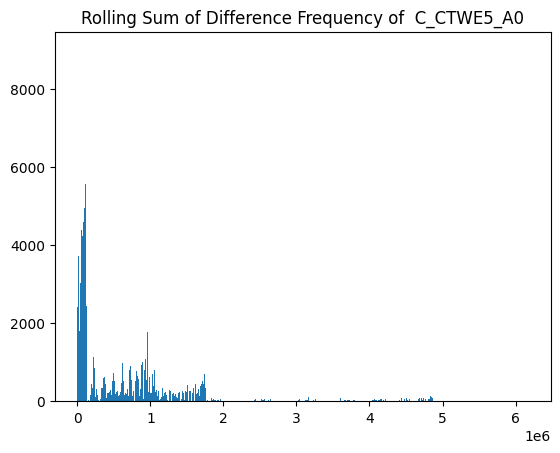

******************************************************************************


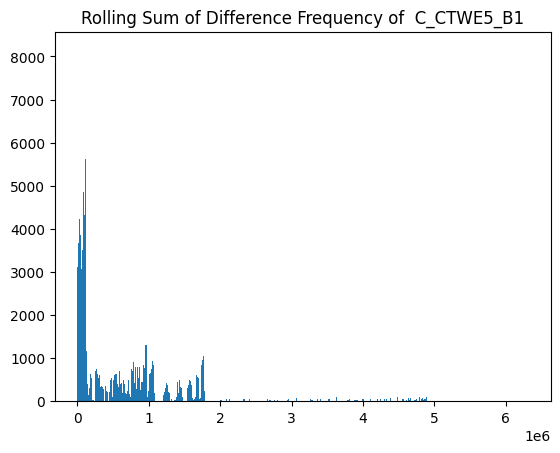

******************************************************************************


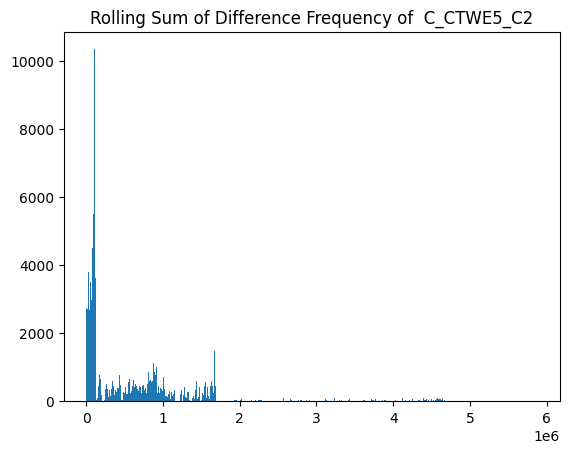

******************************************************************************


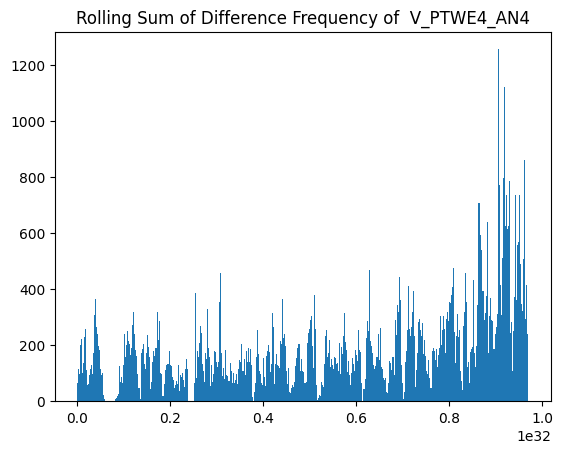

******************************************************************************


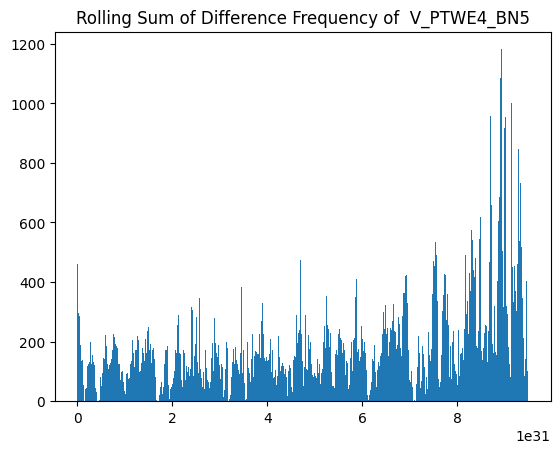

******************************************************************************


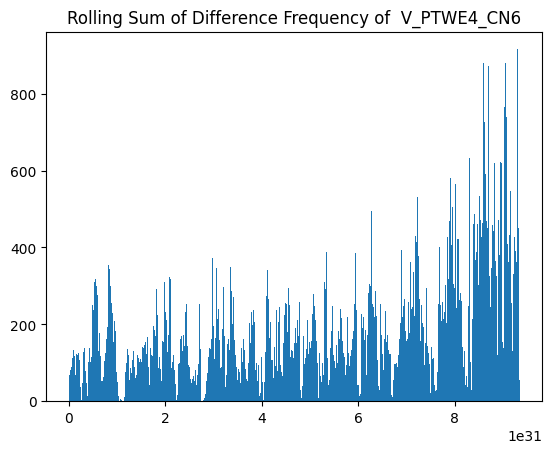

******************************************************************************


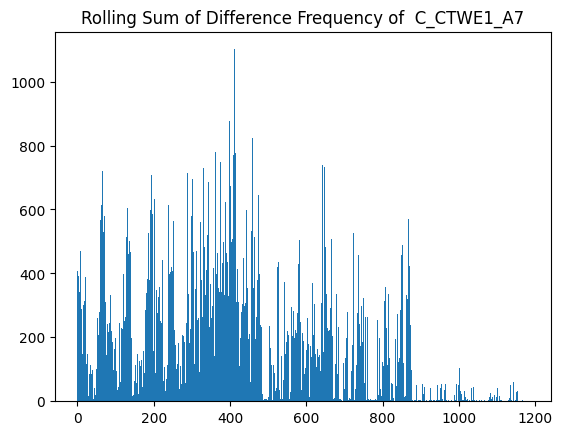

******************************************************************************


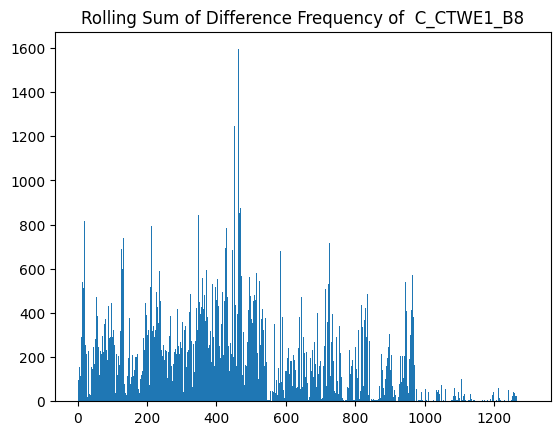

******************************************************************************


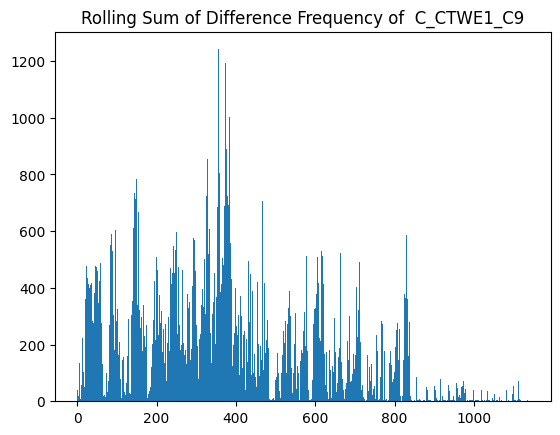

******************************************************************************


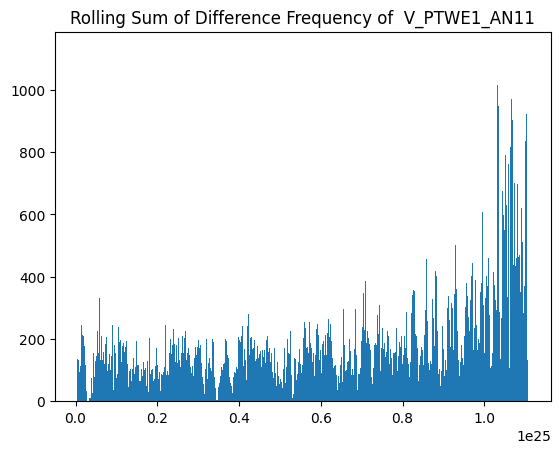

******************************************************************************


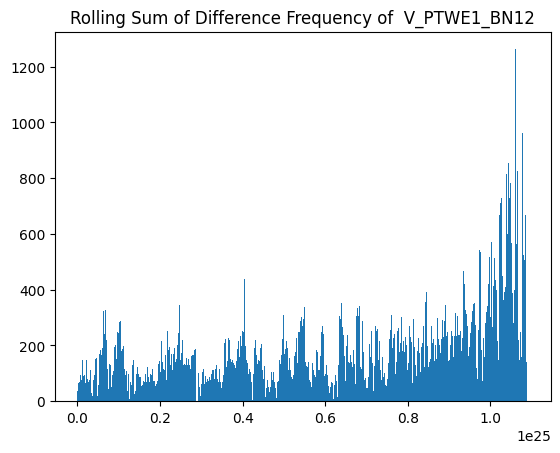

******************************************************************************


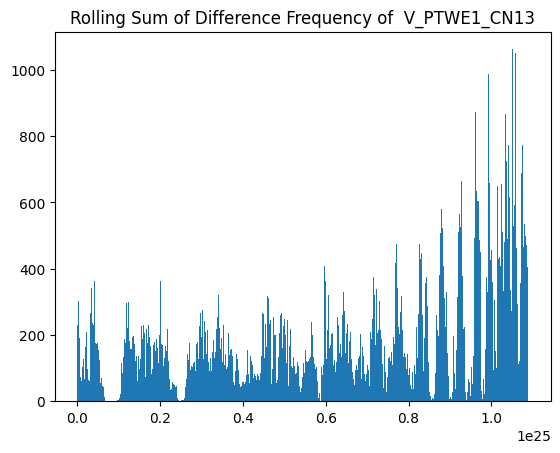

******************************************************************************


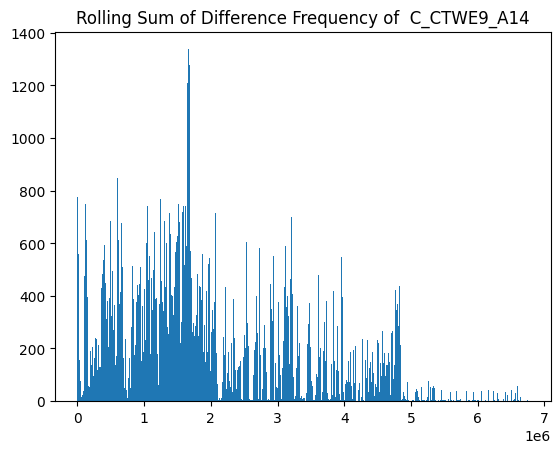

******************************************************************************


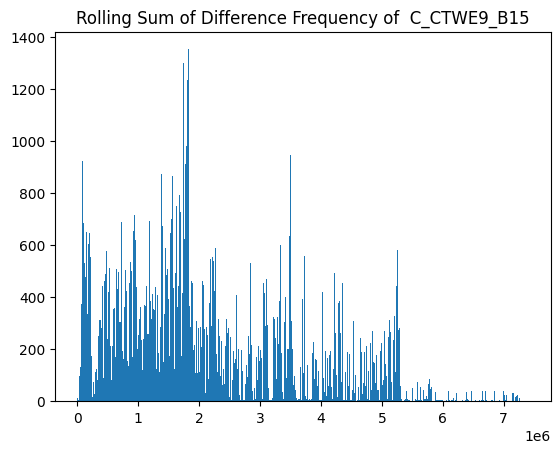

******************************************************************************


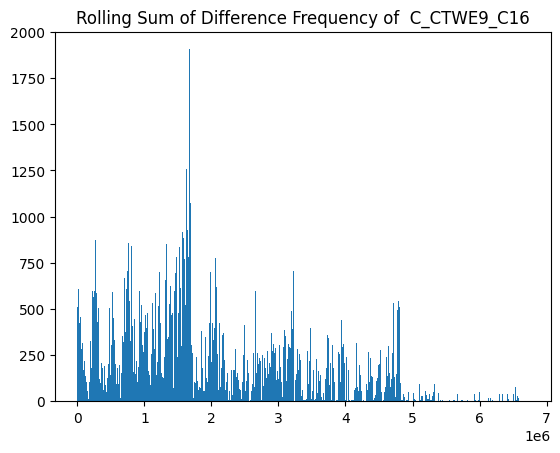

******************************************************************************


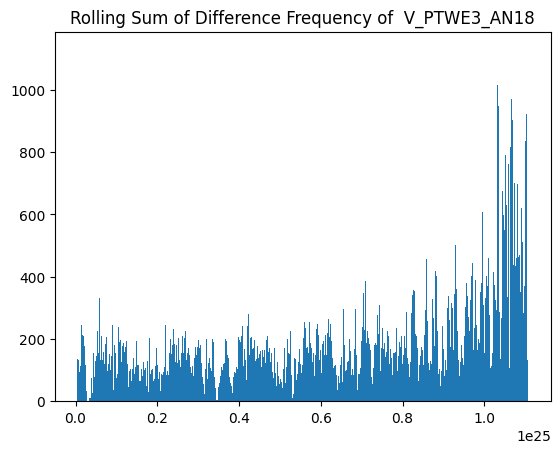

******************************************************************************


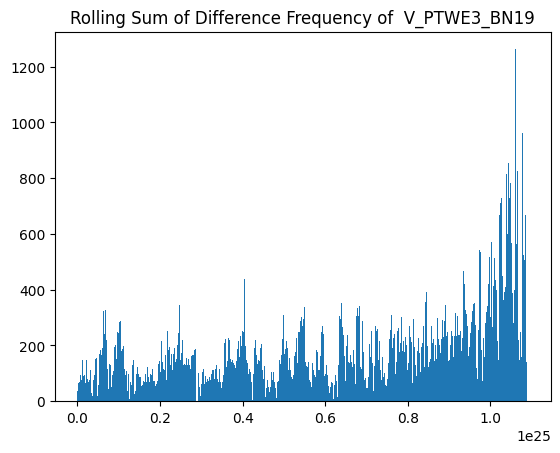

******************************************************************************


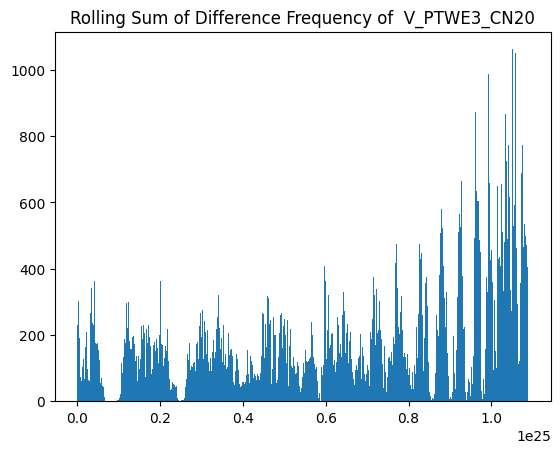

******************************************************************************


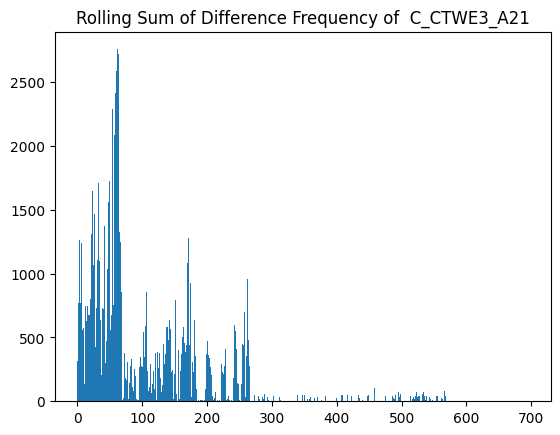

******************************************************************************


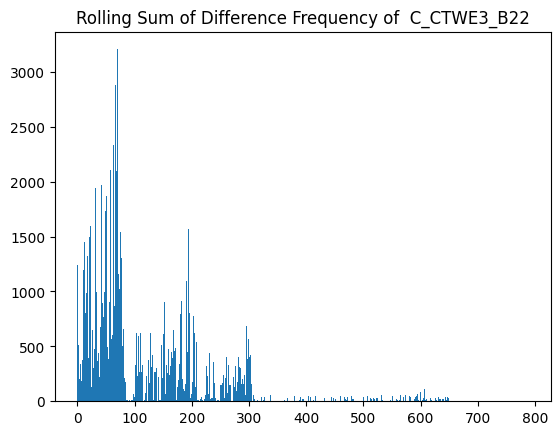

******************************************************************************


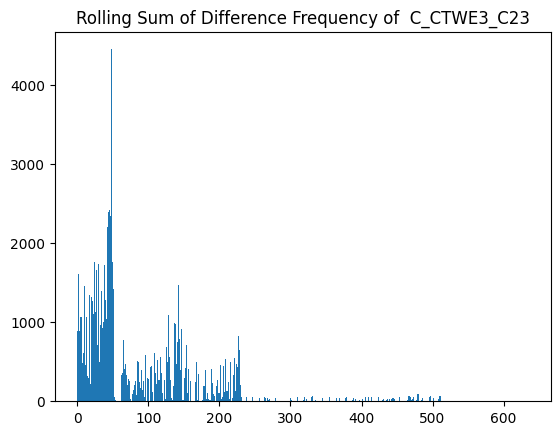

******************************************************************************


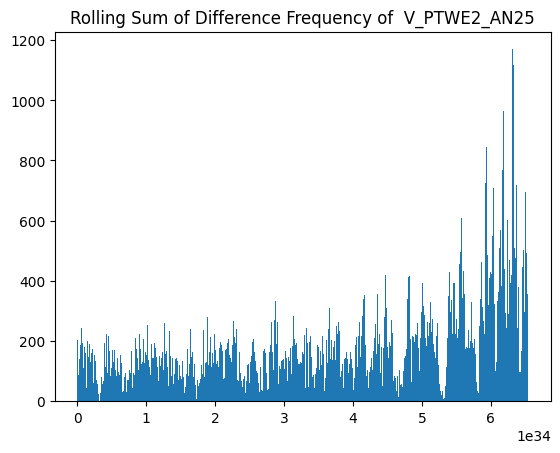

******************************************************************************


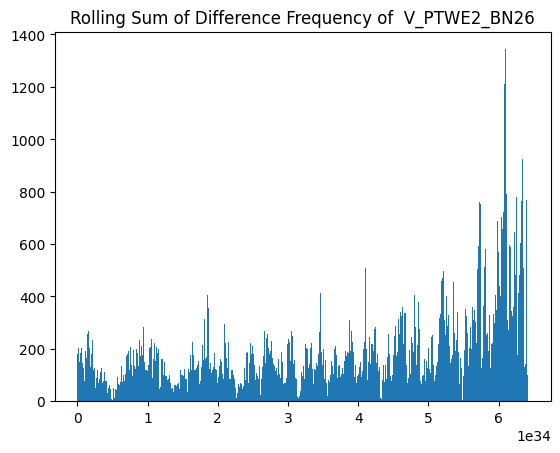

******************************************************************************


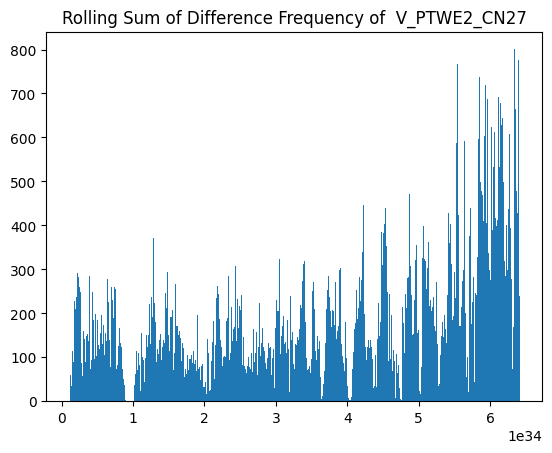

******************************************************************************


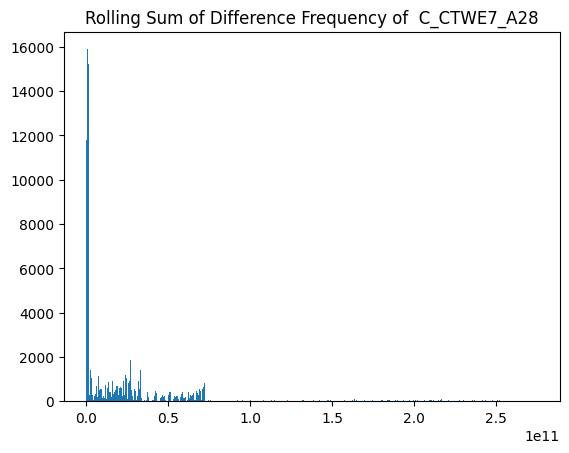

******************************************************************************


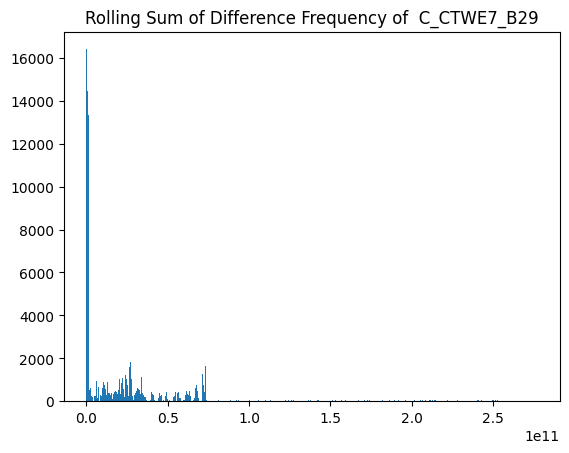

******************************************************************************


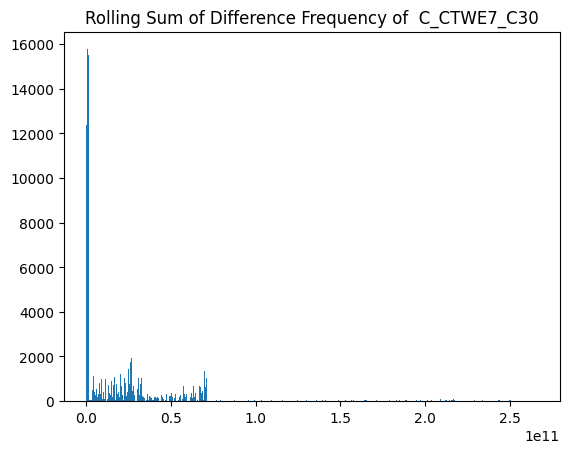

******************************************************************************


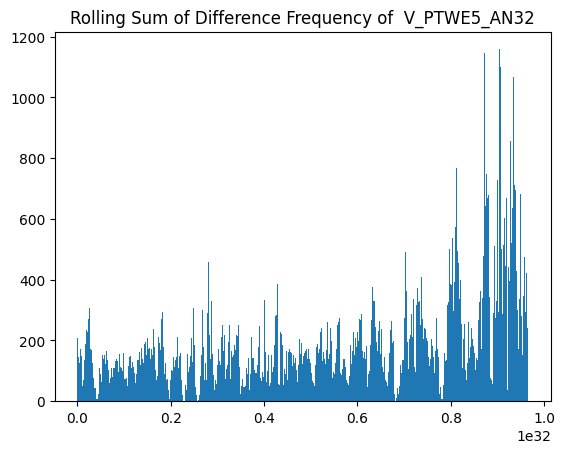

******************************************************************************


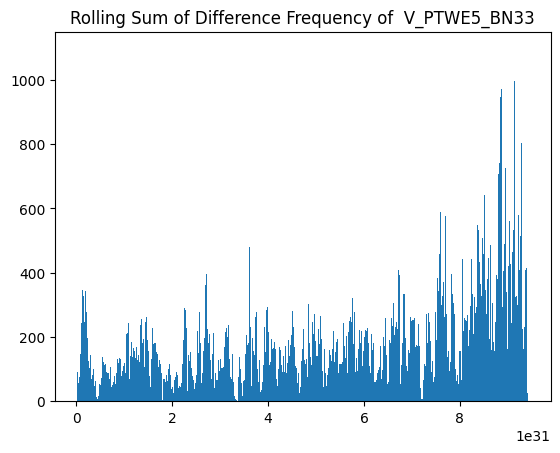

******************************************************************************


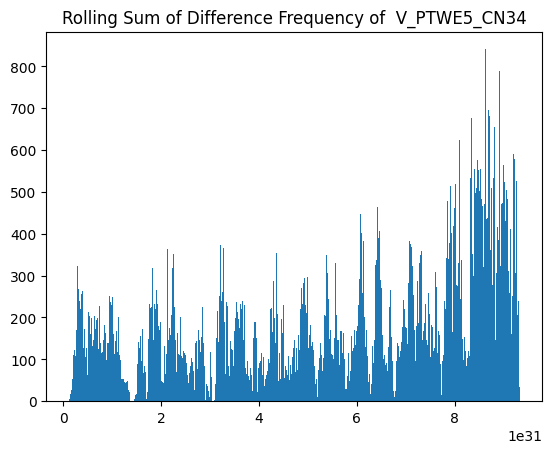

******************************************************************************


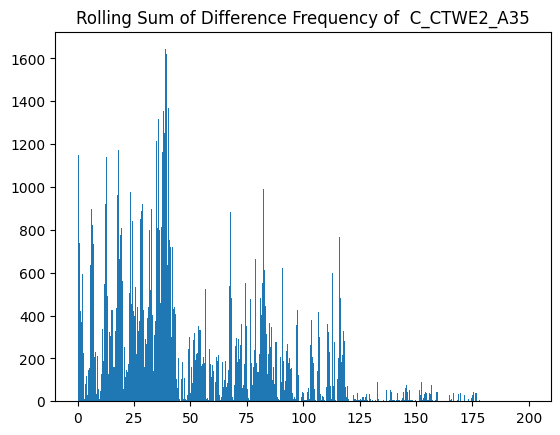

******************************************************************************


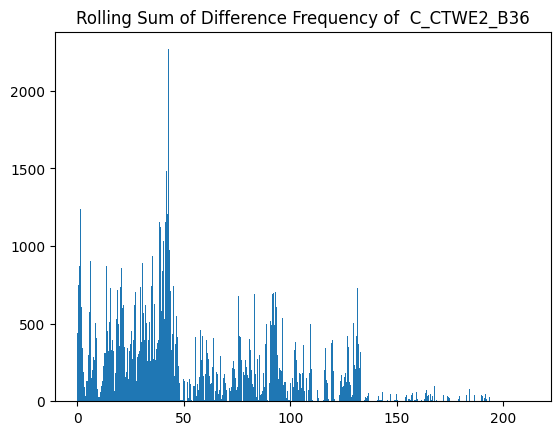

******************************************************************************


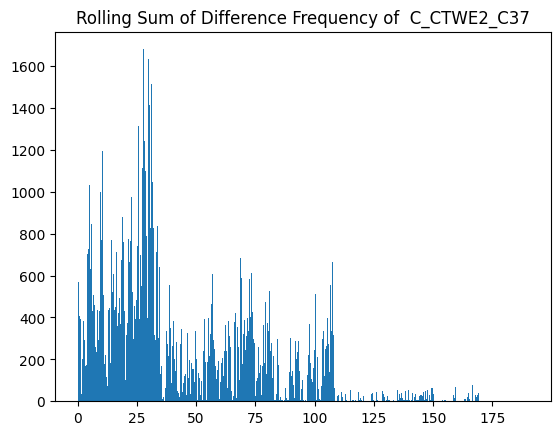

******************************************************************************


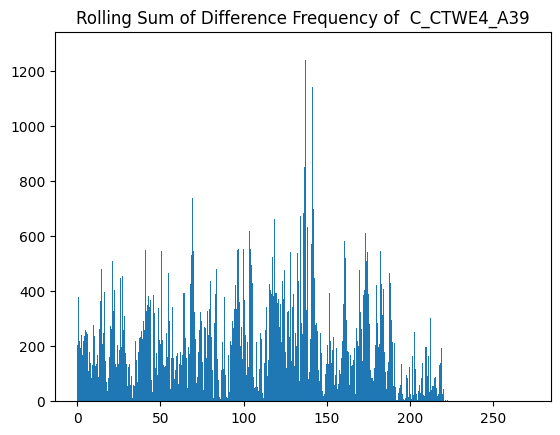

******************************************************************************


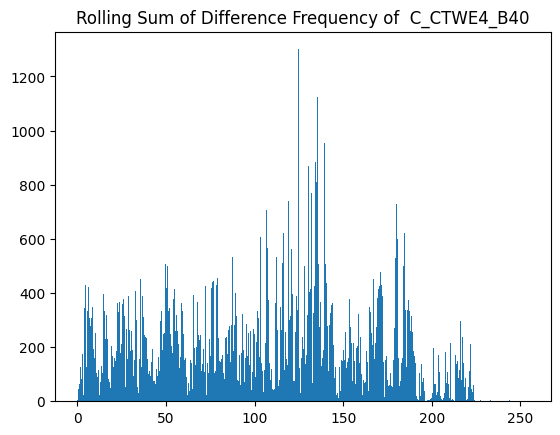

******************************************************************************


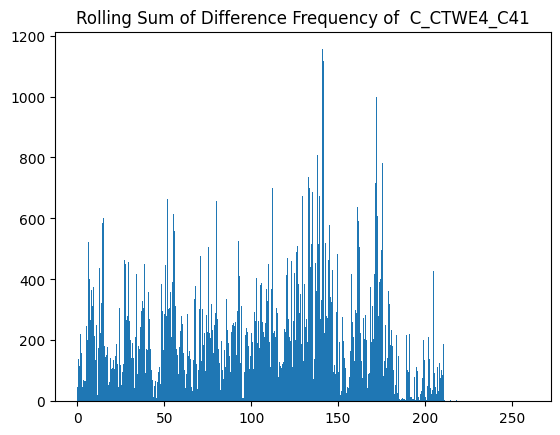

******************************************************************************


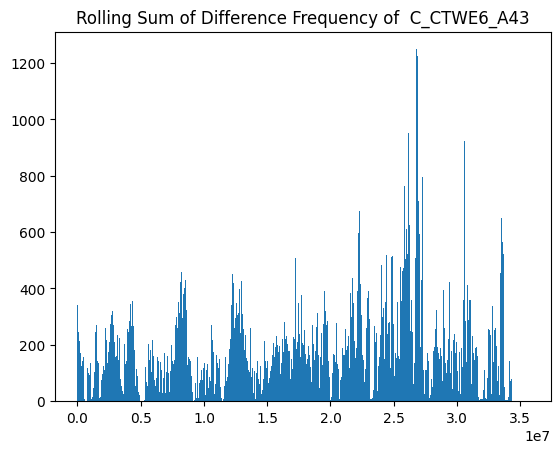

******************************************************************************


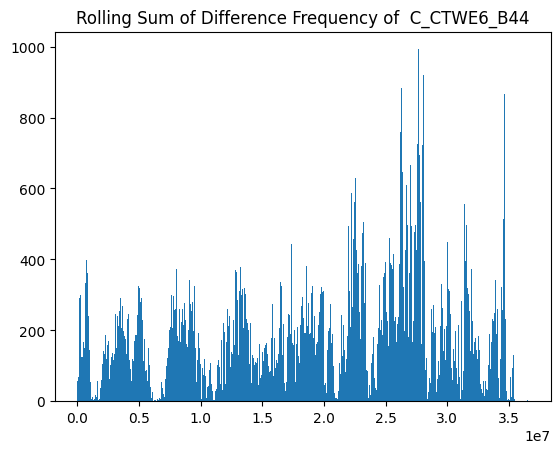

******************************************************************************


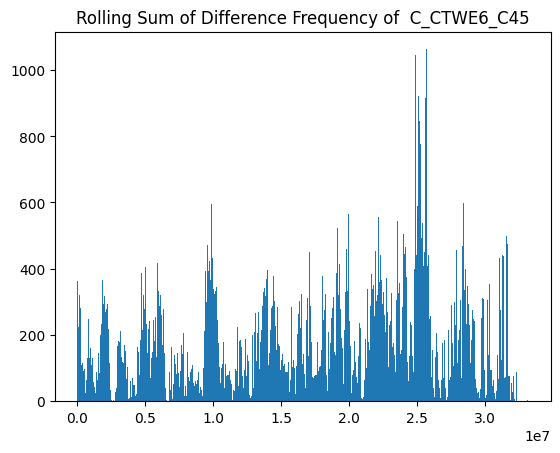

******************************************************************************


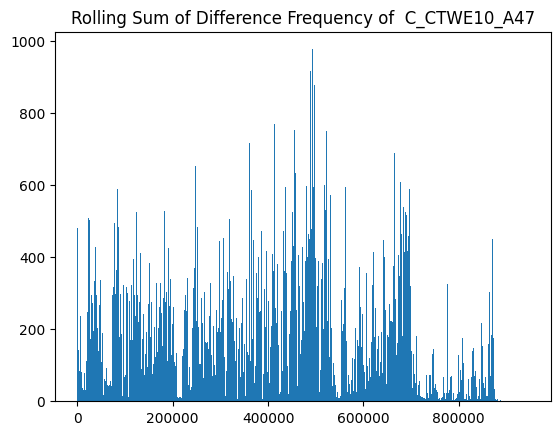

******************************************************************************


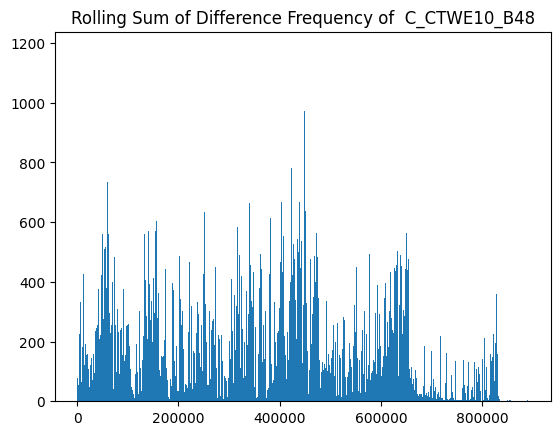

******************************************************************************


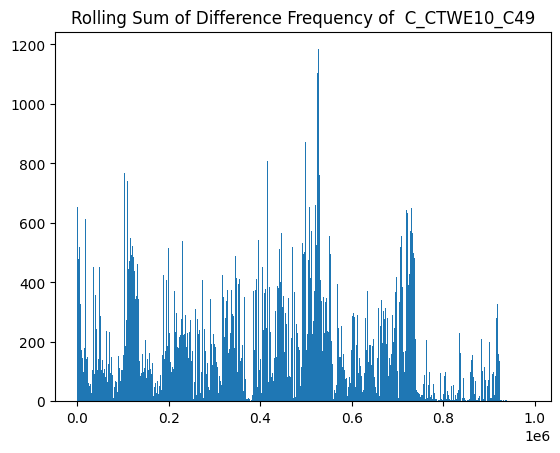

******************************************************************************


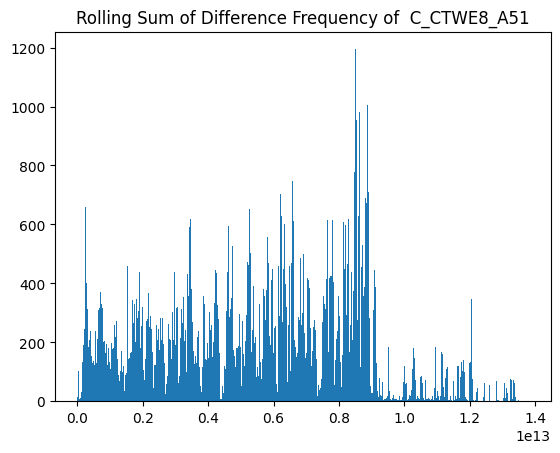

******************************************************************************


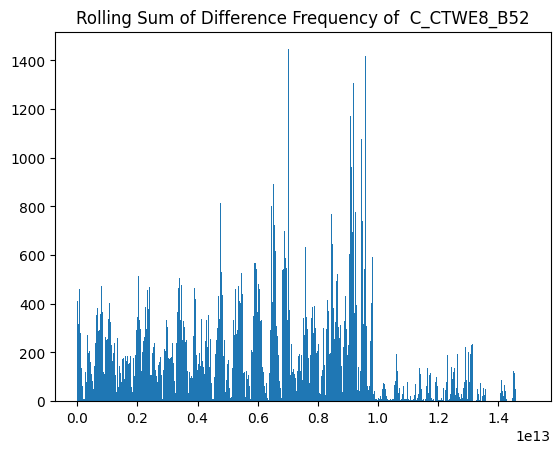

******************************************************************************


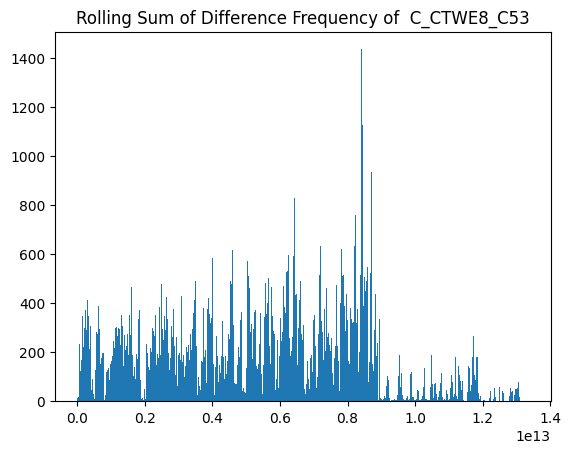

******************************************************************************


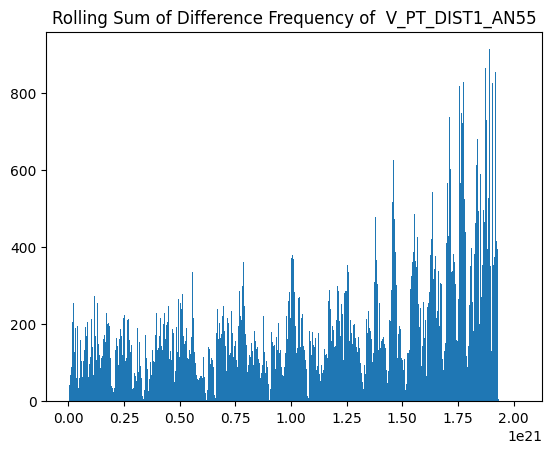

******************************************************************************


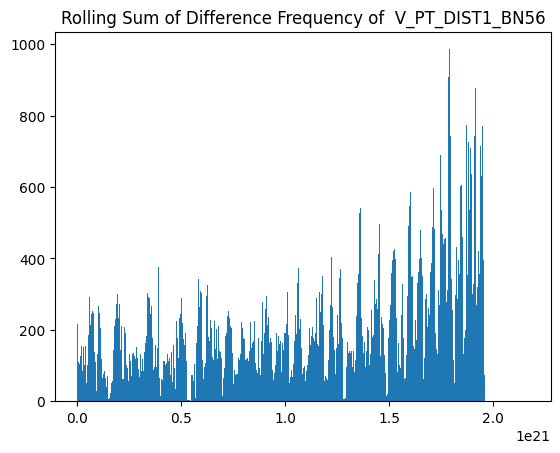

******************************************************************************


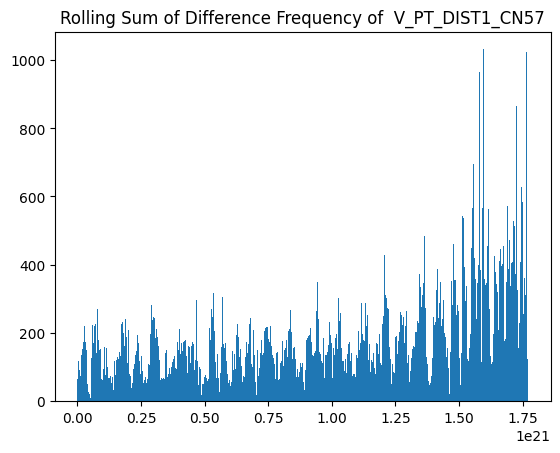

******************************************************************************


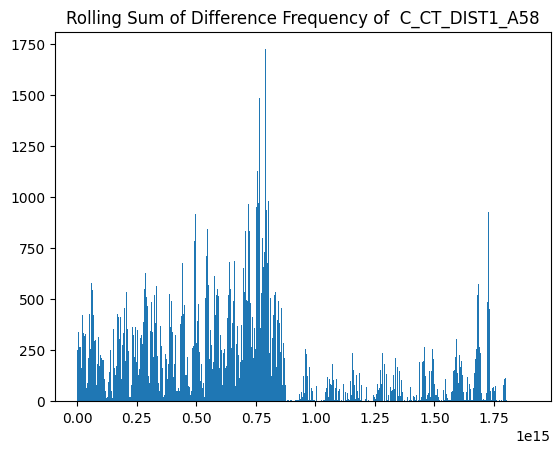

******************************************************************************


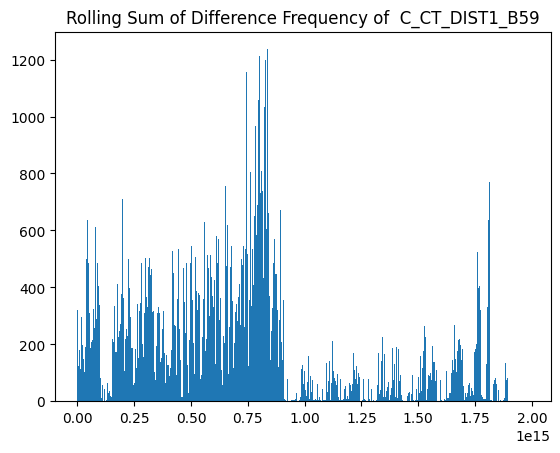

******************************************************************************


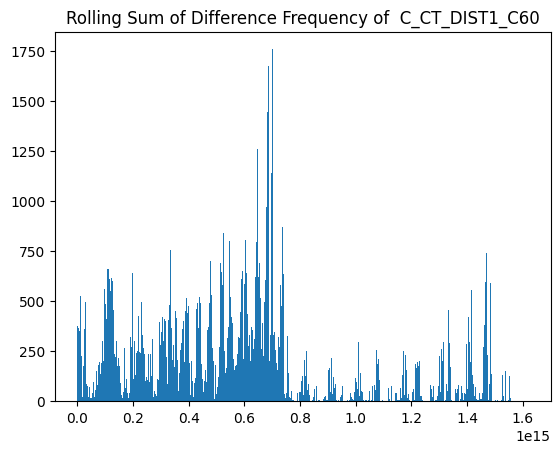

******************************************************************************


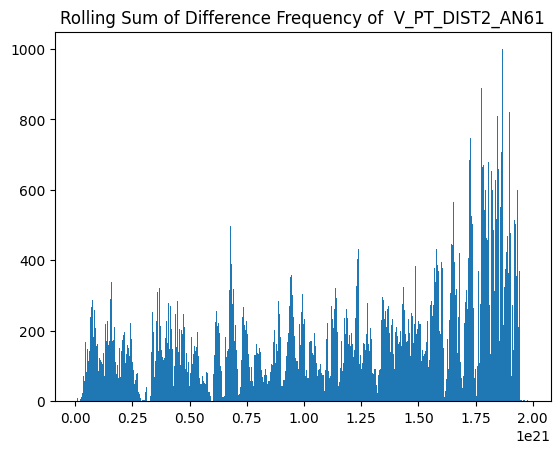

******************************************************************************


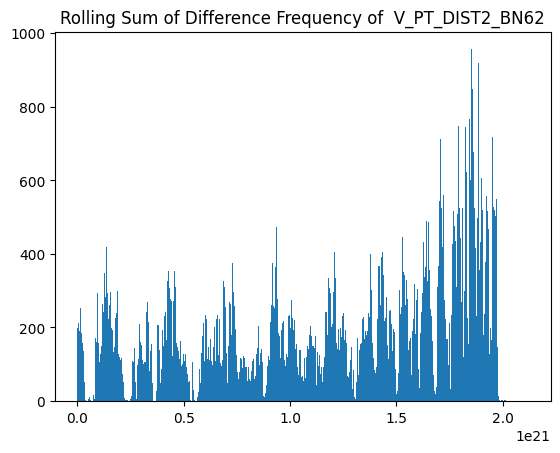

******************************************************************************


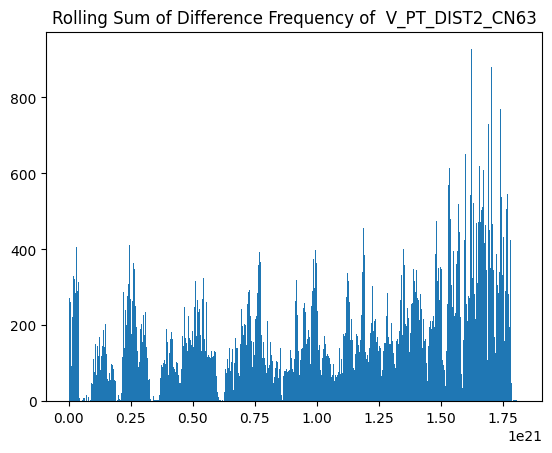

******************************************************************************


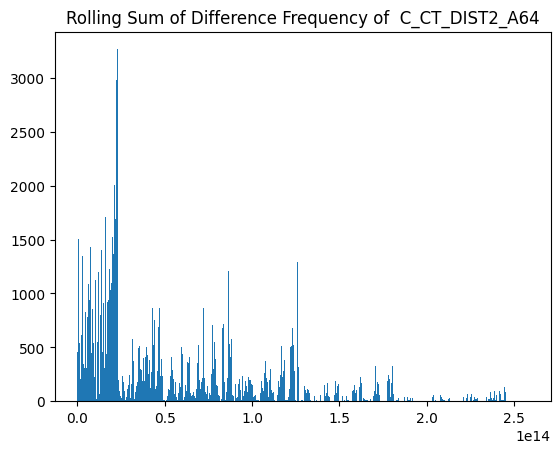

******************************************************************************


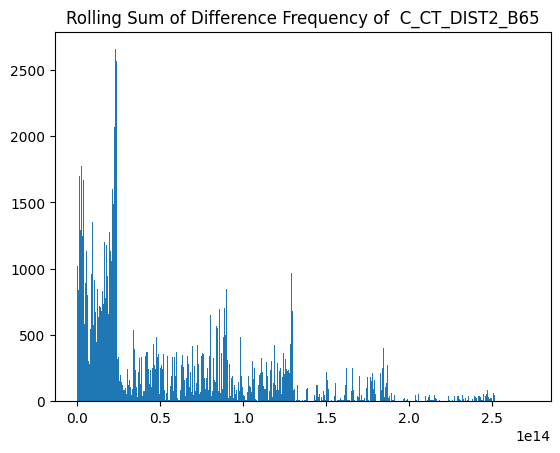

******************************************************************************


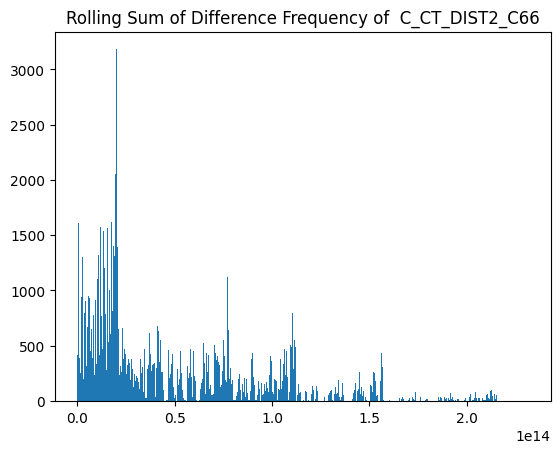

******************************************************************************


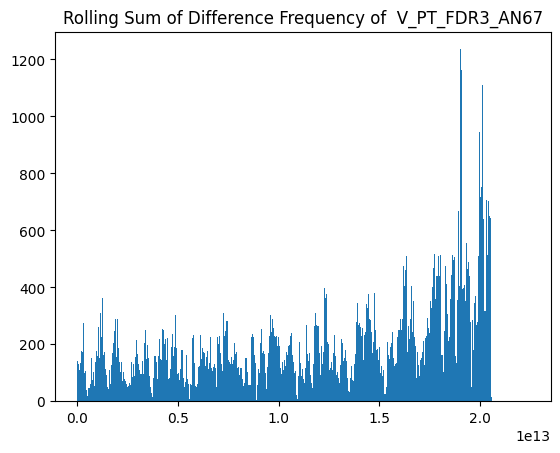

******************************************************************************


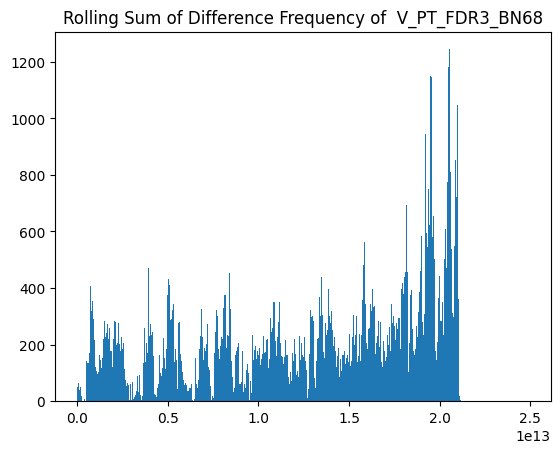

******************************************************************************


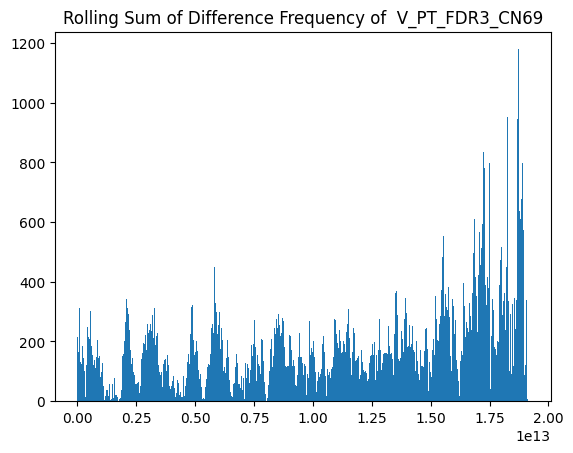

******************************************************************************


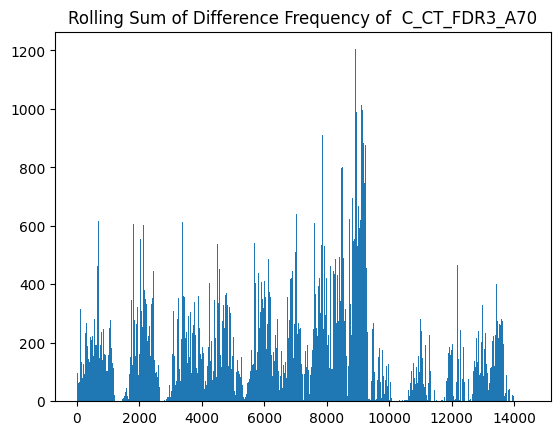

******************************************************************************


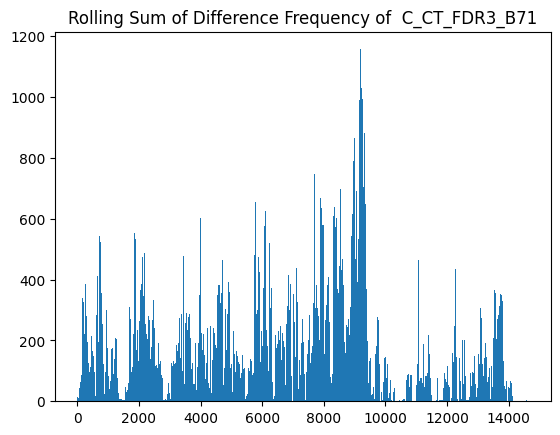

******************************************************************************


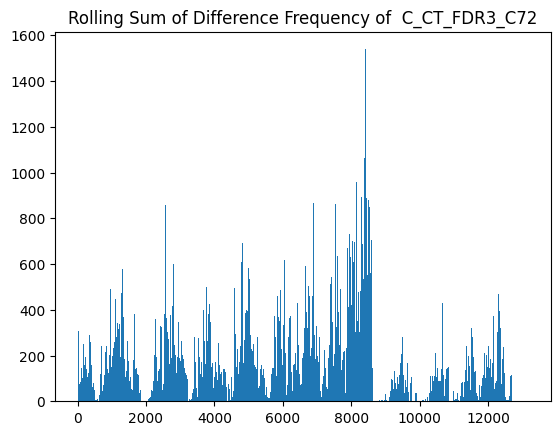

******************************************************************************


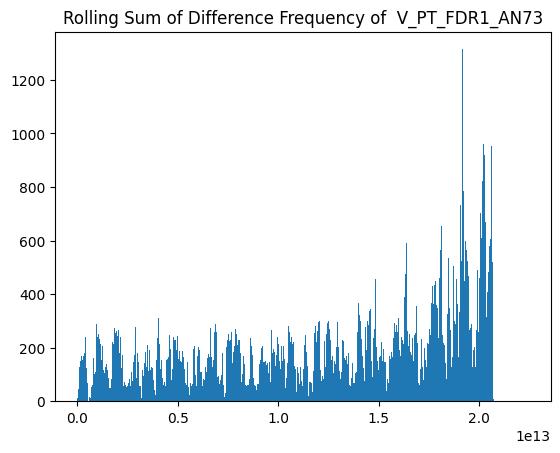

******************************************************************************


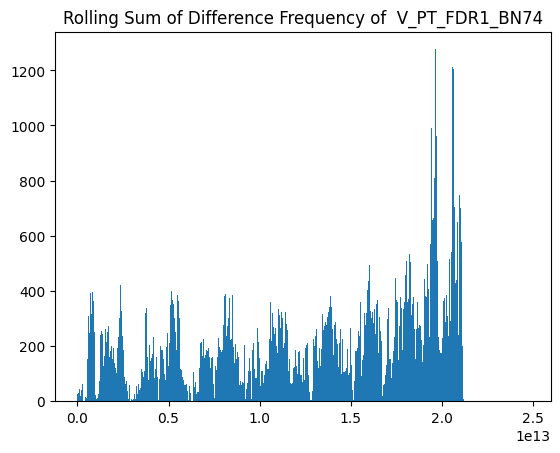

******************************************************************************


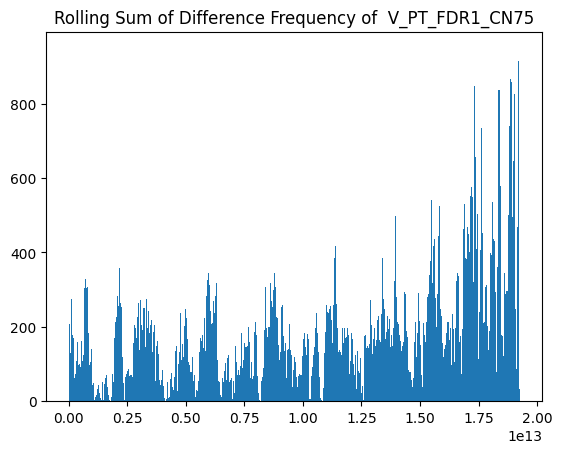

******************************************************************************


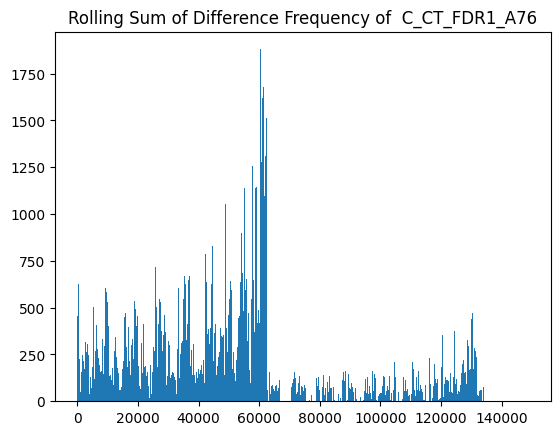

******************************************************************************


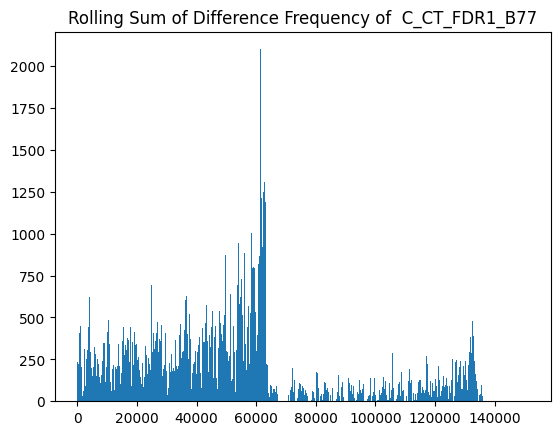

******************************************************************************


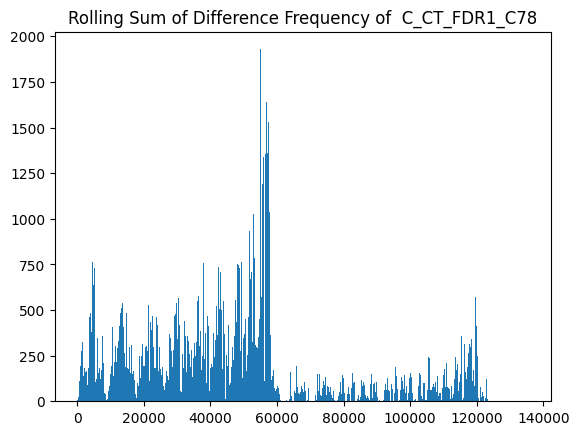

******************************************************************************


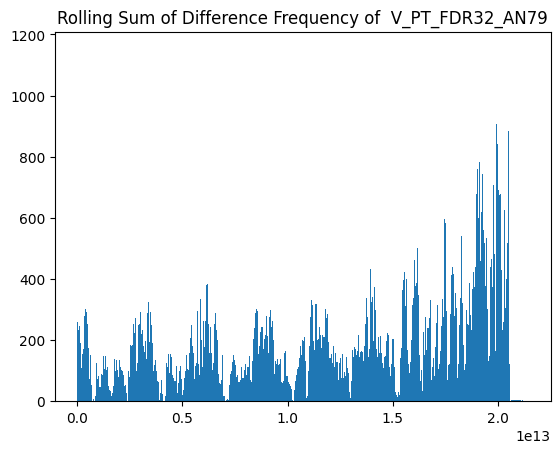

******************************************************************************


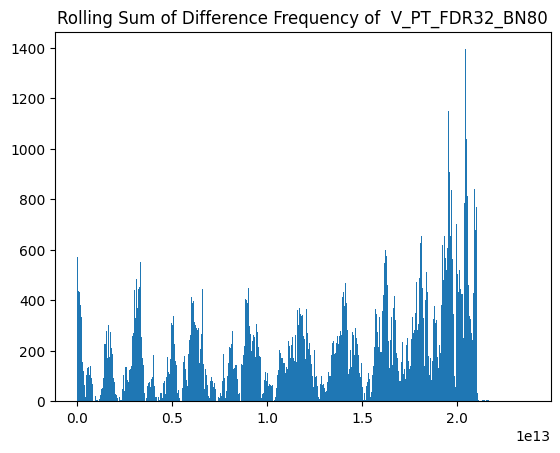

******************************************************************************


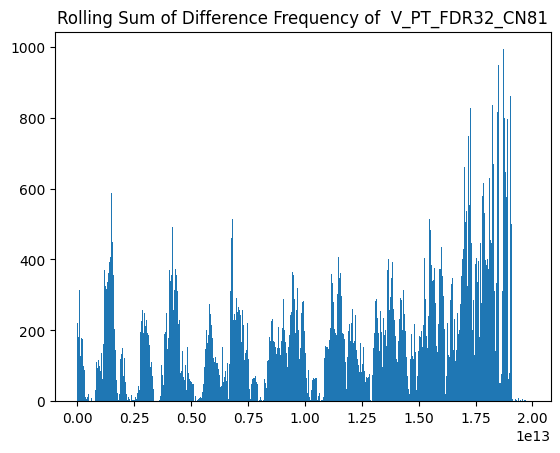

******************************************************************************


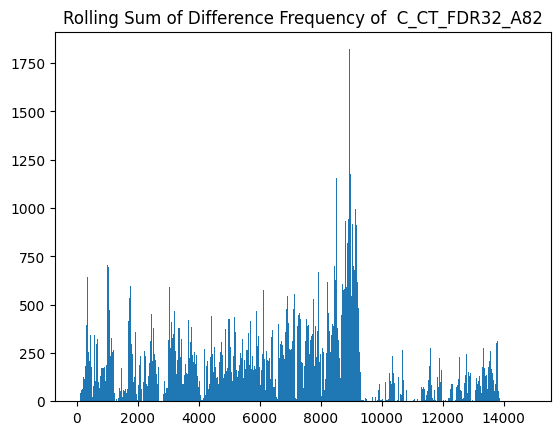

******************************************************************************


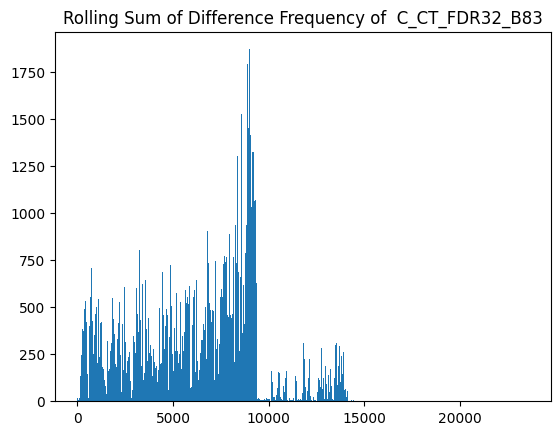

******************************************************************************


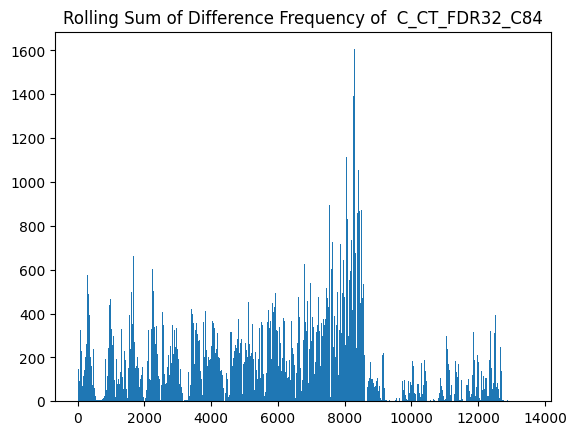

******************************************************************************


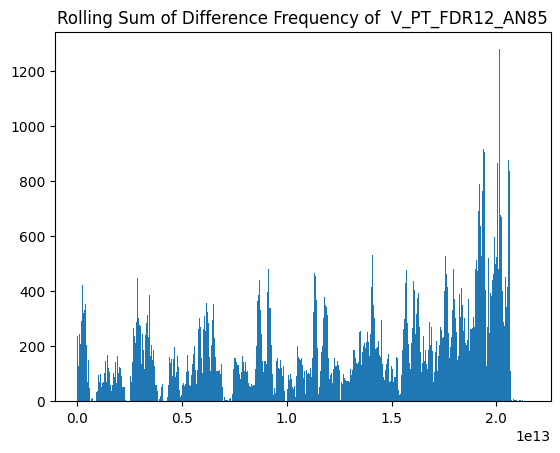

******************************************************************************


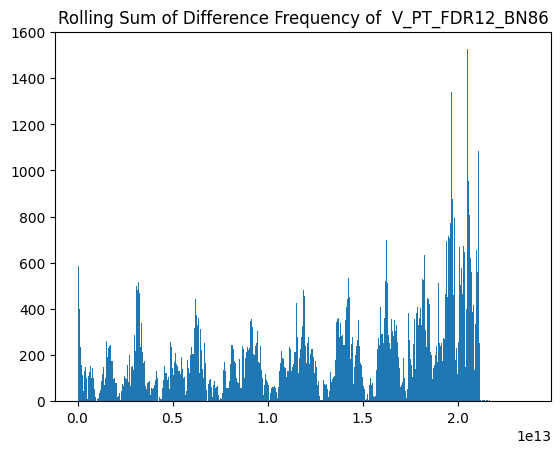

******************************************************************************


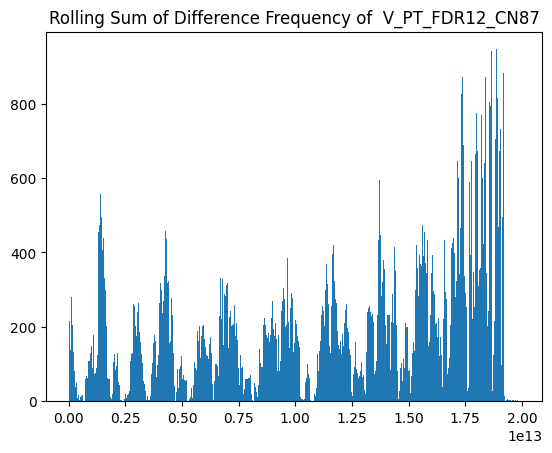

******************************************************************************


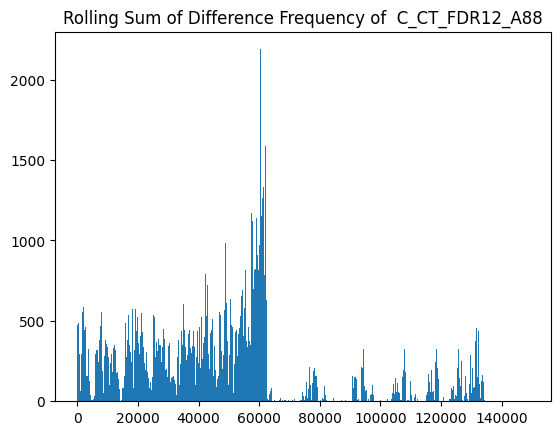

******************************************************************************


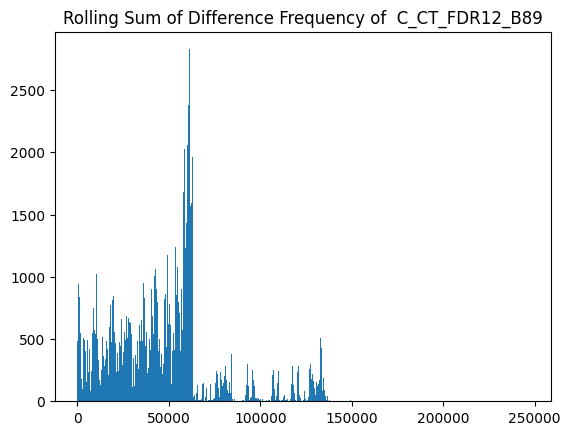

******************************************************************************


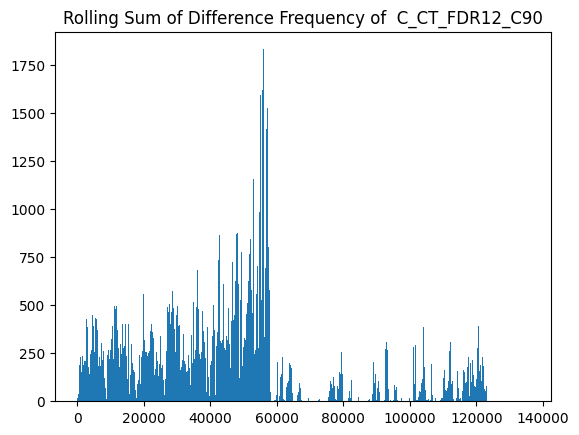

******************************************************************************


In [11]:
# do analysis for multi plot
thresholds = []
thresholds2 = []
cols = data.columns

# correlation window
window = 350

# rolling sum window
w = 1

quant = 1

for var1_index, var2_indices in adj_list.items():
    
    var1_index -= 1
    var2_indices = np.array(var2_indices) - 1
    
    corr_multi = covariance_multi(data, var1_index, var2_indices, window)
    thresholds.append(
        get_empirical_diff_threshold(stat=corr_multi, window=w, fn=roll_sum, axis=-1, quantile=quant,
                                     sensor_names=[var1_index]))
    
    thresholds2.append(get_threshold(stat=corr_multi, window=w, fn=roll_sum, axis=-1, quantile=1-quant))
    print("******************************************************************************")

     

In [12]:
all_attack_indices = set()

for start, end in all_attack_times:
    attack_indices = df_test.index[(df_test['Time'] >= start * 1e6) & (df_test['Time'] <= end * 1e6)] - 1201
    all_attack_indices.add((attack_indices[0], attack_indices[-1]))
    
all_attack_indices

{(4080, 8879),
 (9840, 13199),
 (22800, 27119),
 (30480, 36239),
 (42000, 47279),
 (49200, 54959),
 (76560, 80399),
 (82320, 86639)}

In [13]:
all_attack_indices.remove((9840, 13199))
    
all_attack_indices

{(4080, 8879),
 (22800, 27119),
 (30480, 36239),
 (42000, 47279),
 (49200, 54959),
 (76560, 80399),
 (82320, 86639)}

In [14]:
y_true = np.zeros(len(data_test))
for start, end in all_attack_indices:
    y_true[slice(start, end)] = 1

In [15]:
cov_list = []

w = 1

for var1_index, var2_indices in adj_list.items():
    
    var1_index -= 1
    var2_indices = np.array(var2_indices) - 1

    cov_multi = covariance_multi(data_test, var1_index, var2_indices, window=350)
    cov_list.append(
        roll_sum(stat=cov_multi,window=w, axis=0)
    )
    
rsum_list = np.array(cov_list)


  

In [16]:
thresholds

[6174786.786075711,
 6313965.778048873,
 5873602.301682353,
 9.69956155066582e+31,
 9.49569232184913e+31,
 9.3442145292807e+31,
 1182.015981611854,
 1298.6070960843354,
 1137.341425619641,
 1.107583976125282e+25,
 1.091606872484795e+25,
 1.0893634563259267e+25,
 6758161.105114579,
 7403824.0591186285,
 6727702.804782629,
 1.107583976125282e+25,
 1.091606872484795e+25,
 1.089363456325913e+25,
 695.3371313656244,
 788.3991211932153,
 634.807160970071,
 6.5423374205887075e+34,
 6.421586690154319e+34,
 6.413174310830589e+34,
 275143887745.91016,
 276960008703.3125,
 266179497073.06445,
 9.660396403067328e+31,
 9.426921122347478e+31,
 9.32388390123859e+31,
 199.82258365077178,
 211.81237465121012,
 190.16360642235304,
 271.2786017638791,
 254.40571977426953,
 259.4384679839877,
 35630604.472896576,
 36559382.47415066,
 33223950.170186043,
 945864.5891534835,
 891066.4773491323,
 985711.4448790401,
 13790323594396.875,
 15006711798034.25,
 13351412762141.25,
 2.0269237964689176e+21,
 2.17017

In [17]:
things = []
for i in adj_list:
  things+=[i]

***********************************************************************************************
Sensor: 1  C_CTWE5_A, No Attacks


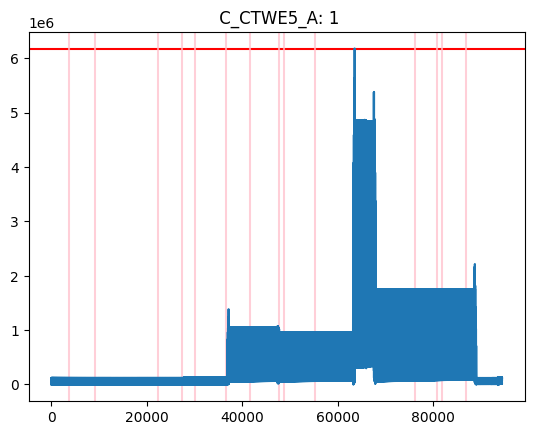

***********************************************************************************************
Sensor: 2  C_CTWE5_B, No Attacks


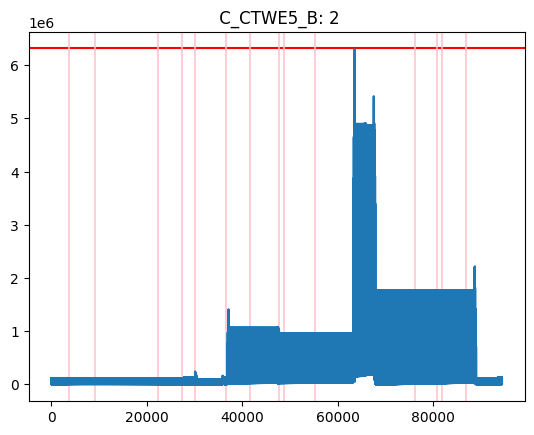

***********************************************************************************************
Sensor: 3  C_CTWE5_C, No Attacks


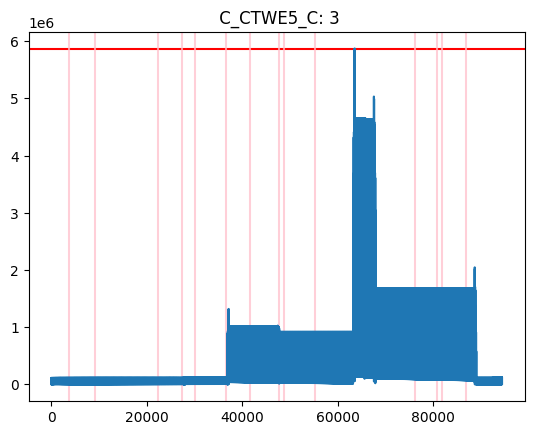

***********************************************************************************************
Sensor: 5  V_PTWE4_AN, Attack Type: PT_ratio, Time Attacked: 5.003926s to 5.972462s


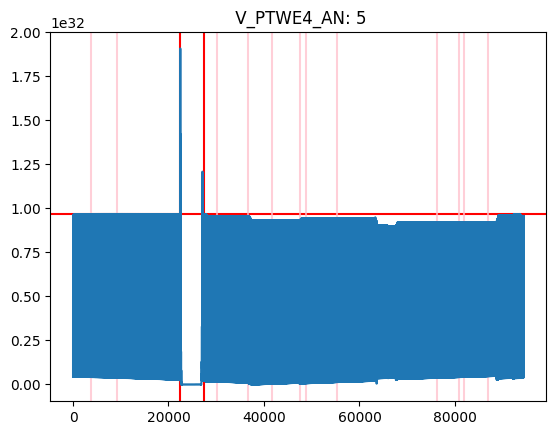

EDD = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 4662, 4663, 4664, 4665, 4666, 4667]
***********************************************************************************************
Sensor: 6  V_PTWE4_BN, No Attacks


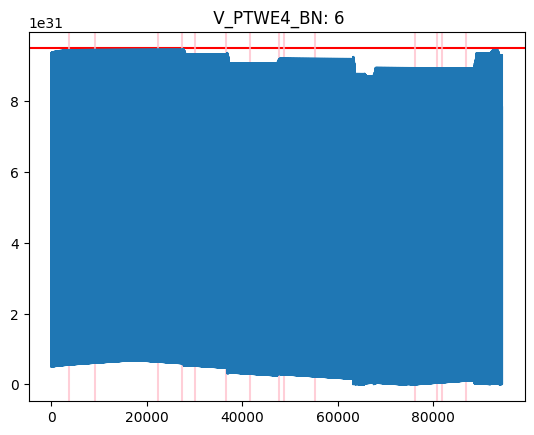

***********************************************************************************************
Sensor: 7  V_PTWE4_CN, No Attacks


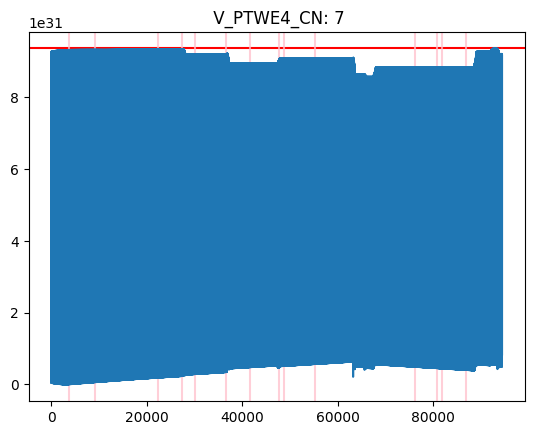

***********************************************************************************************
Sensor: 8  C_CTWE1_A, No Attacks


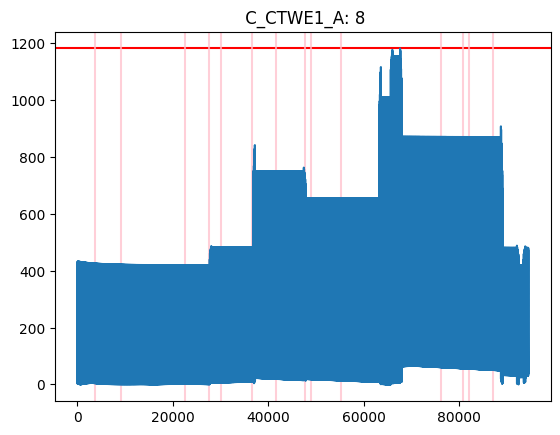

***********************************************************************************************
Sensor: 9  C_CTWE1_B, No Attacks


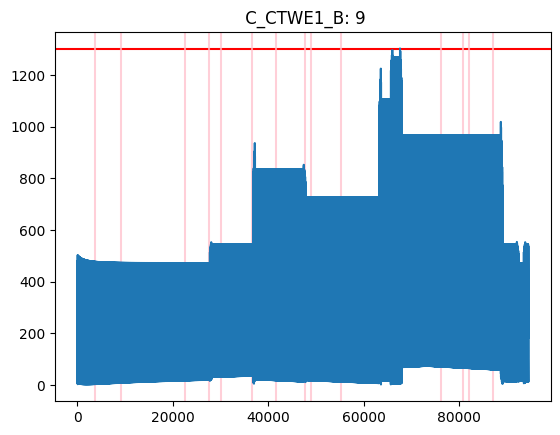

***********************************************************************************************
Sensor: 10  C_CTWE1_C, No Attacks


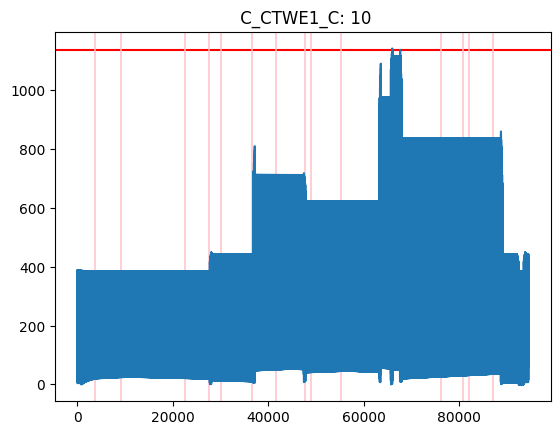

***********************************************************************************************
Sensor: 12  V_PTWE1_AN, Attack Type: PT_ratio, Time Attacked: 5.004135s to 5.047676s


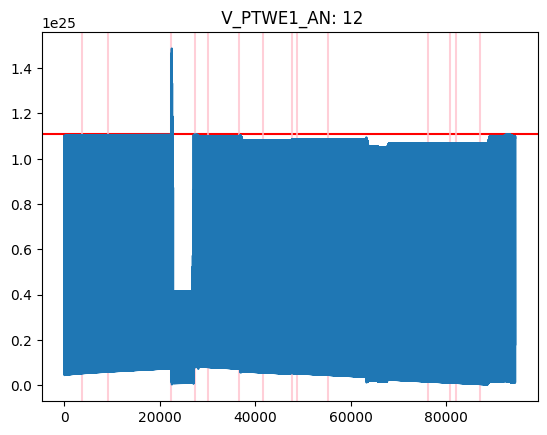

EDD = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 4662, 4663, 4664, 4665, 4666, 4667]
***********************************************************************************************
Sensor: 13  V_PTWE1_BN, No Attacks


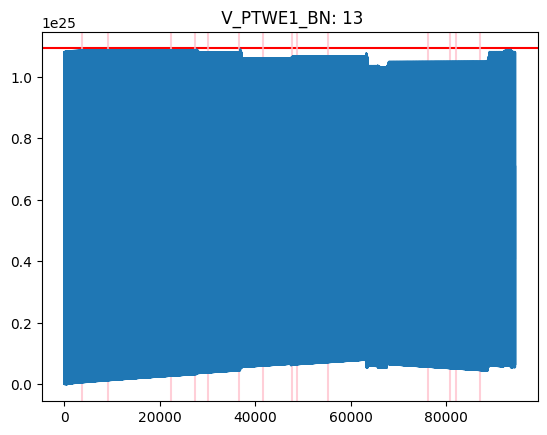

***********************************************************************************************
Sensor: 14  V_PTWE1_CN, No Attacks


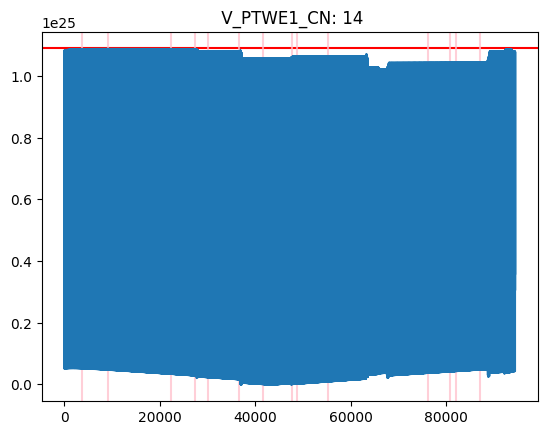

***********************************************************************************************
Sensor: 15  C_CTWE9_A, No Attacks


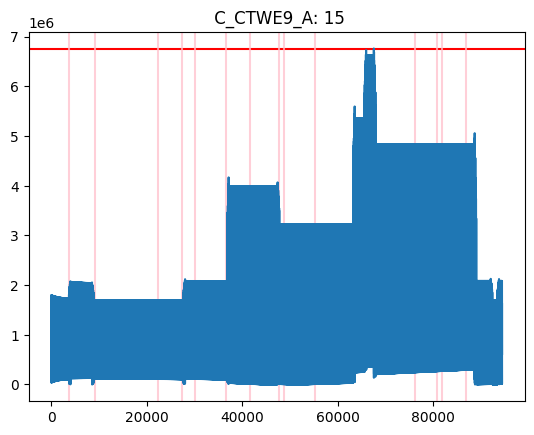

***********************************************************************************************
Sensor: 16  C_CTWE9_B, No Attacks


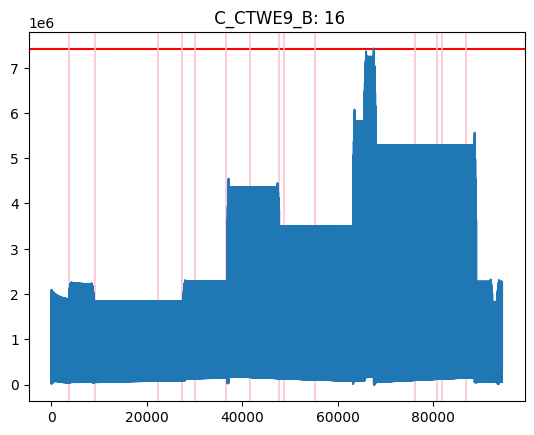

***********************************************************************************************
Sensor: 17  C_CTWE9_C, No Attacks


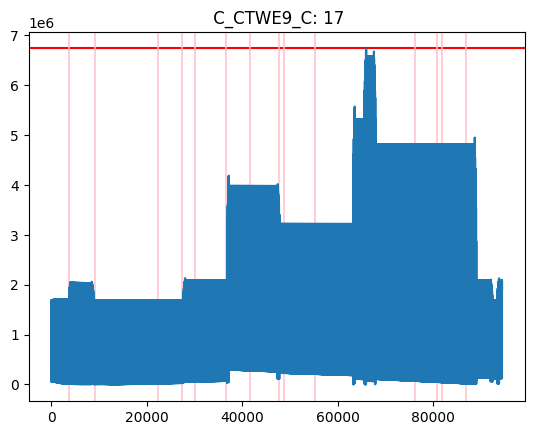

***********************************************************************************************
Sensor: 19  V_PTWE3_AN, Attack Type: PT_ratio, Time Attacked: 5.004135s to 5.047676s


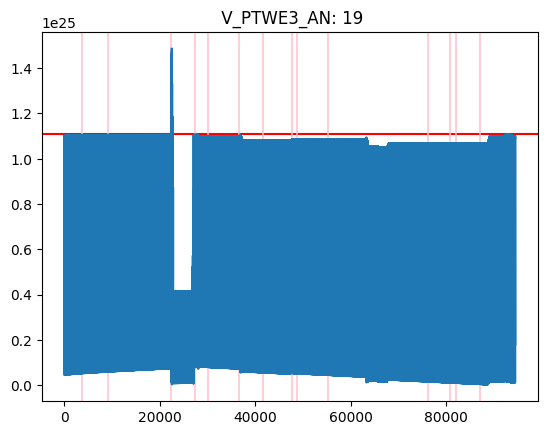

EDD = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 4662, 4663, 4664, 4665, 4666, 4667]
***********************************************************************************************
Sensor: 20  V_PTWE3_BN, No Attacks


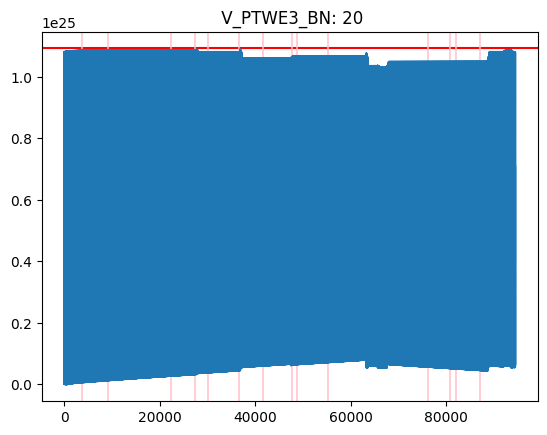

***********************************************************************************************
Sensor: 21  V_PTWE3_CN, No Attacks


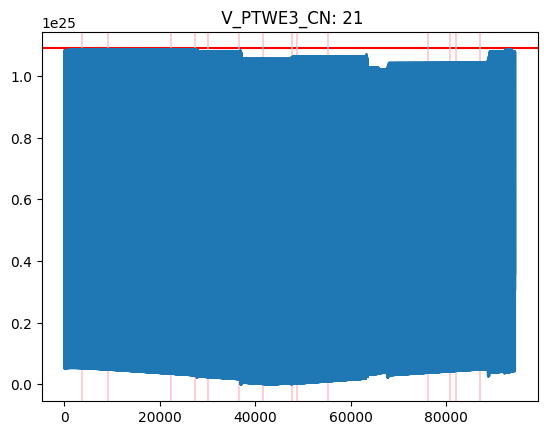

***********************************************************************************************
Sensor: 22  C_CTWE3_A, No Attacks


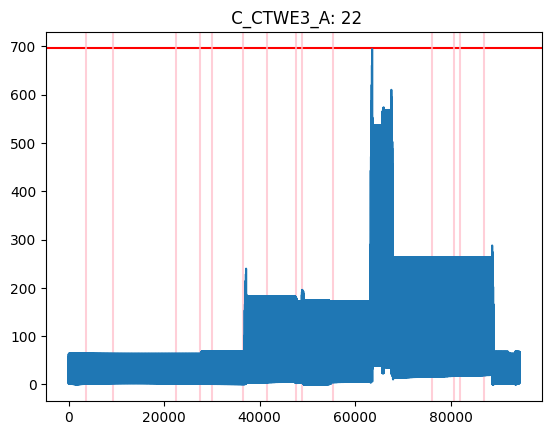

***********************************************************************************************
Sensor: 23  C_CTWE3_B, No Attacks


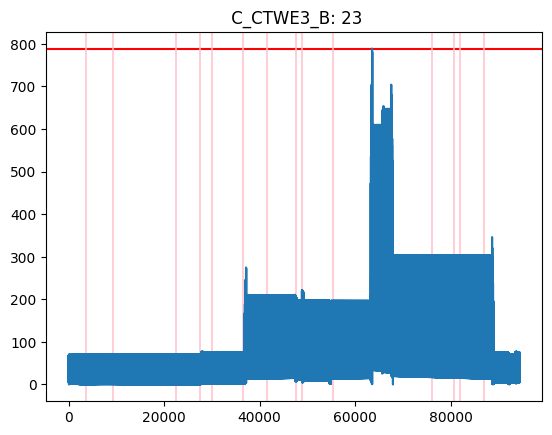

***********************************************************************************************
Sensor: 24  C_CTWE3_C, No Attacks


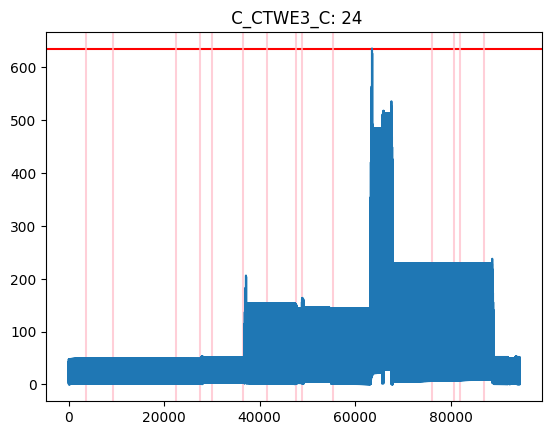

***********************************************************************************************
Sensor: 26  V_PTWE2_AN, Attack Type: PT_ratio, Time Attacked: 5.004343s to 19.804665s


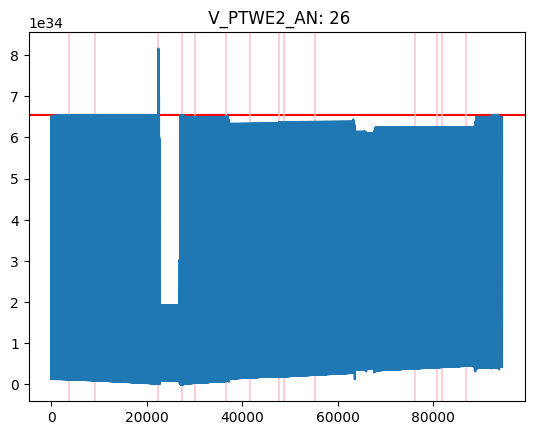

EDD = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 4662, 4663, 4664, 4665, 4666, 4667]
***********************************************************************************************
Sensor: 27  V_PTWE2_BN, No Attacks


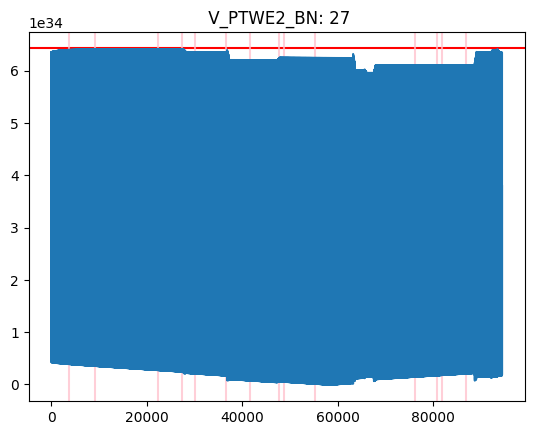

***********************************************************************************************
Sensor: 28  V_PTWE2_CN, No Attacks


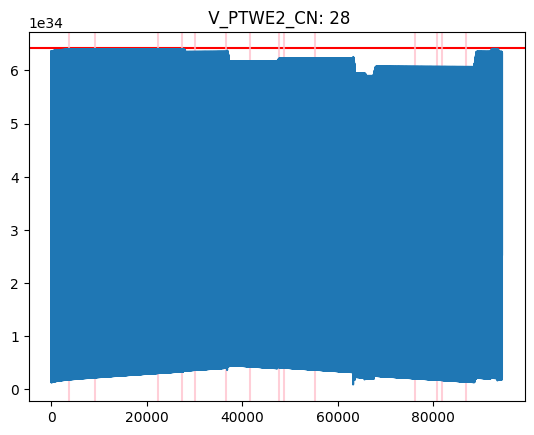

***********************************************************************************************
Sensor: 29  C_CTWE7_A, No Attacks


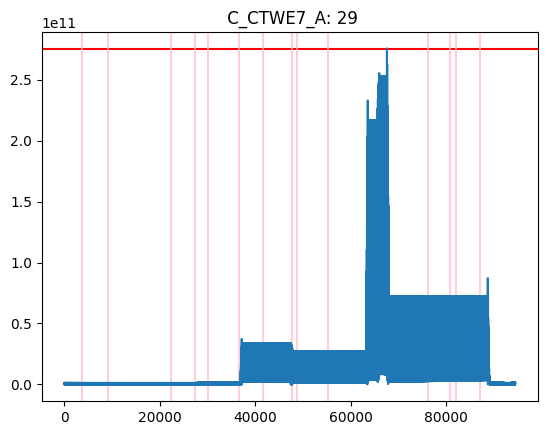

***********************************************************************************************
Sensor: 30  C_CTWE7_B, No Attacks


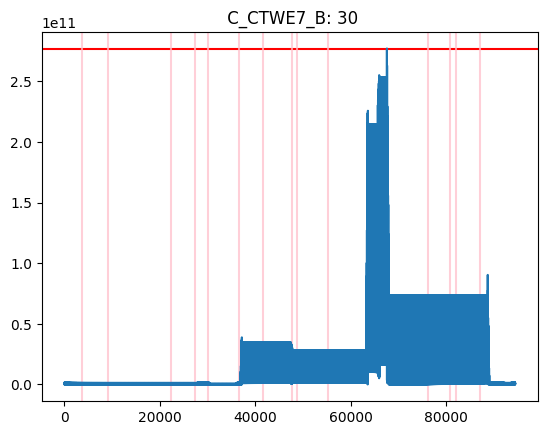

***********************************************************************************************
Sensor: 31  C_CTWE7_C, No Attacks


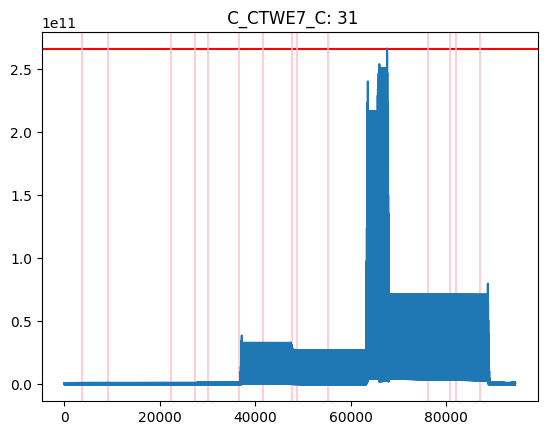

***********************************************************************************************
Sensor: 33  V_PTWE5_AN, No Attacks


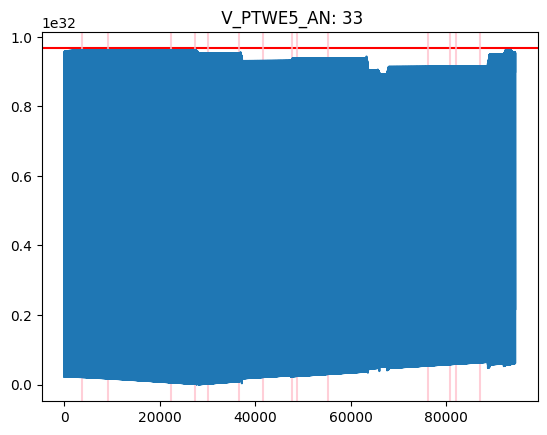

***********************************************************************************************
Sensor: 34  V_PTWE5_BN, No Attacks


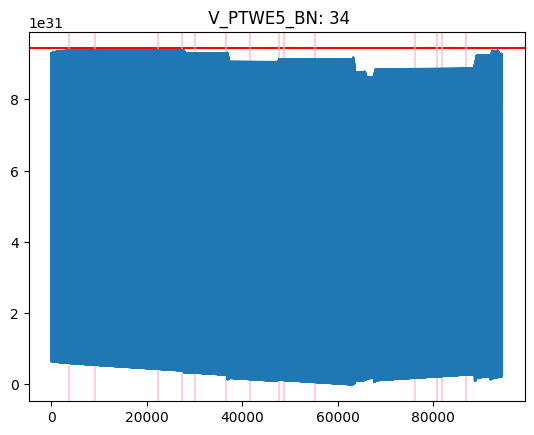

***********************************************************************************************
Sensor: 35  V_PTWE5_CN, No Attacks


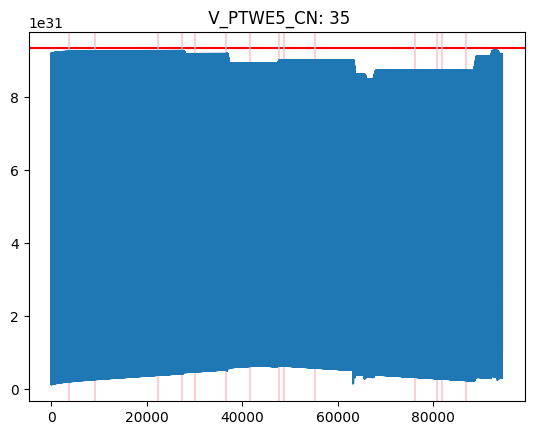

***********************************************************************************************
Sensor: 36  C_CTWE2_A, No Attacks


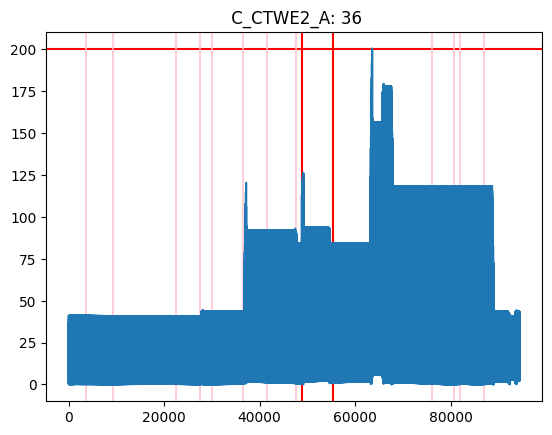

***********************************************************************************************
Sensor: 37  C_CTWE2_B, No Attacks


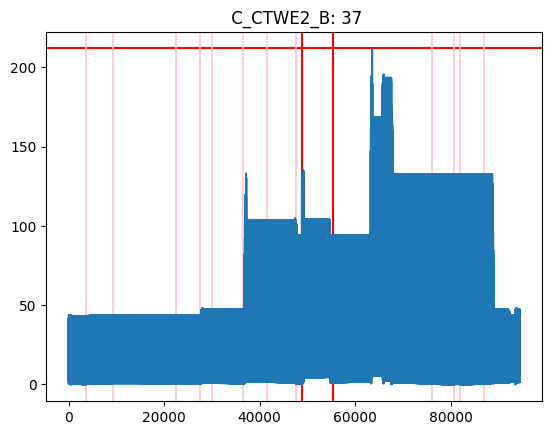

***********************************************************************************************
Sensor: 38  C_CTWE2_C, No Attacks


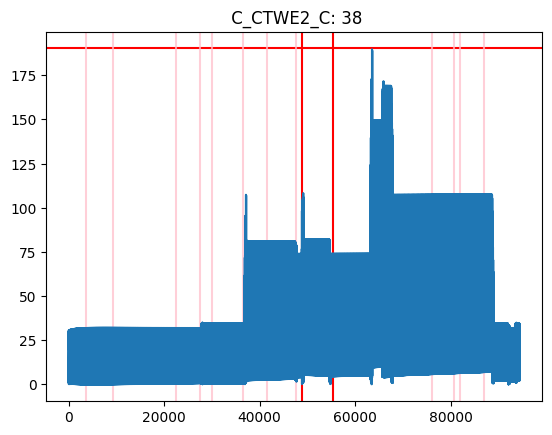

***********************************************************************************************
Sensor: 40  C_CTWE4_A, No Attacks


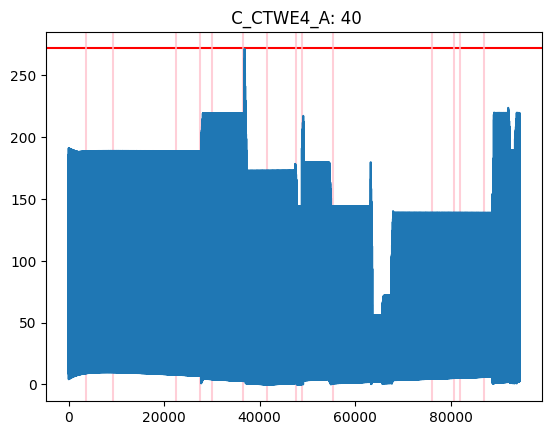

***********************************************************************************************
Sensor: 41  C_CTWE4_B, No Attacks


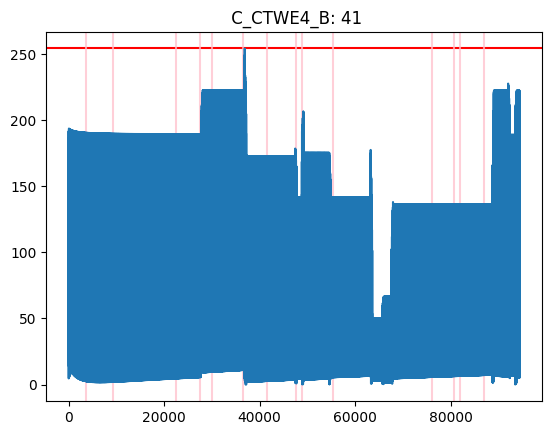

***********************************************************************************************
Sensor: 42  C_CTWE4_C, No Attacks


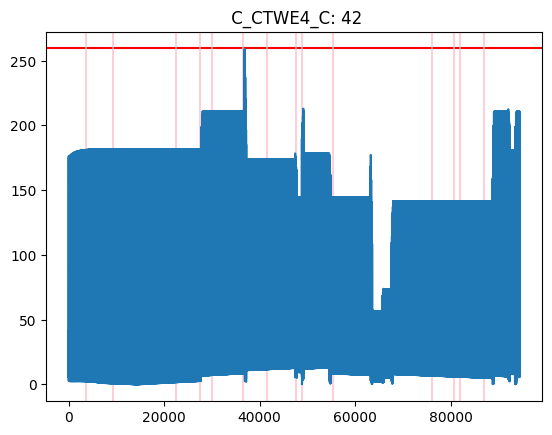

***********************************************************************************************
Sensor: 44  C_CTWE6_A, No Attacks


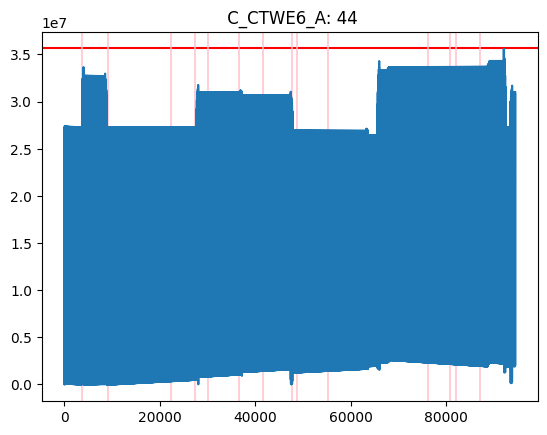

***********************************************************************************************
Sensor: 45  C_CTWE6_B, No Attacks


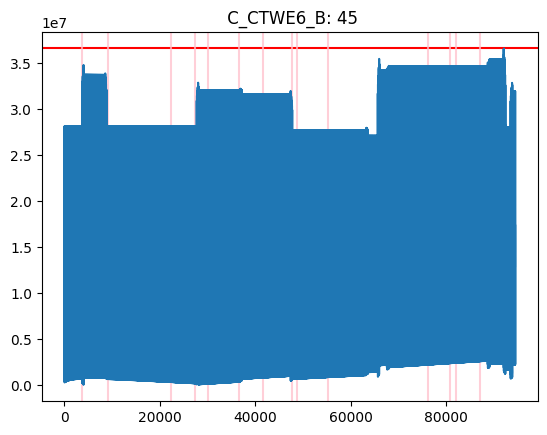

***********************************************************************************************
Sensor: 46  C_CTWE6_C, No Attacks


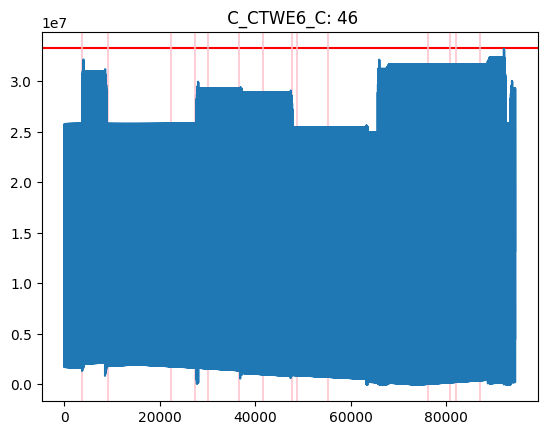

***********************************************************************************************
Sensor: 48  C_CTWE10_A, No Attacks


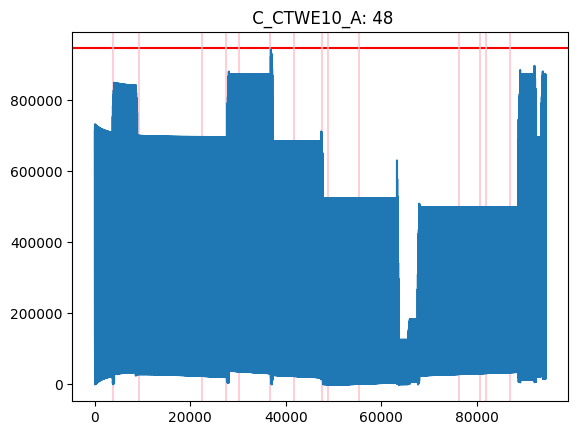

***********************************************************************************************
Sensor: 49  C_CTWE10_B, No Attacks


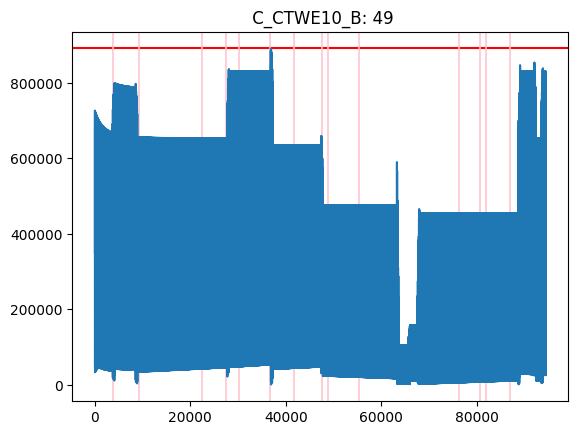

***********************************************************************************************
Sensor: 50  C_CTWE10_C, No Attacks


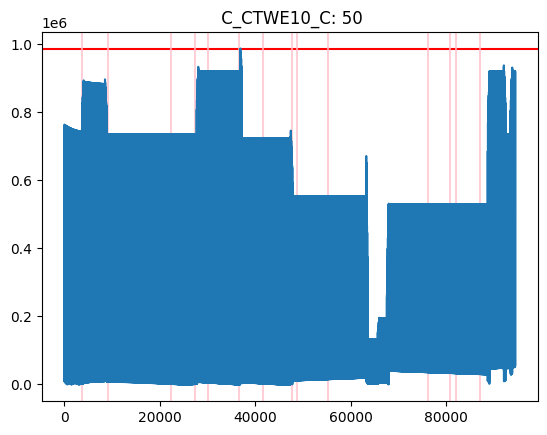

***********************************************************************************************
Sensor: 52  C_CTWE8_A, Attack Type: CT_ratio, Time Attacked: 1.126034s to 19.5055s


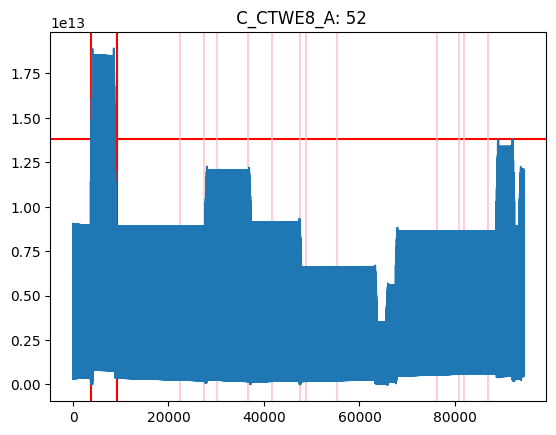

EDD = [124, 125, 126, 127, 163, 164, 165, 166, 167, 168, 202, 203, 204, 205, 206, 207, 208, 209, 242, 243, 244, 245, 246, 247, 248, 249, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 343, 344, 345, 346, 348, 349, 350, 362, 363, 364, 365, 366, 367, 368, 369, 370, 381, 382, 383, 384, 385, 386, 387, 388, 389, 402, 403, 404, 405, 406, 407, 408, 409, 410, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 442, 443, 444, 445, 446, 447, 448, 449, 450, 461, 462, 463, 464, 465, 466, 467, 468, 469, 482, 483, 484, 485, 486, 487, 488, 489, 490, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 522, 523, 524, 525, 526, 527, 528, 529, 530, 541, 542, 543, 544, 545, 546, 547, 548, 549, 562, 563, 564, 565, 566, 567, 568, 569, 570, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 602, 603, 604, 605, 606, 607, 608, 609, 610, 621, 622, 623, 624, 625, 626, 627, 628, 629, 642, 643, 644, 645, 646, 647, 648, 649, 650, 661, 662, 663, 664, 665, 666, 667, 668

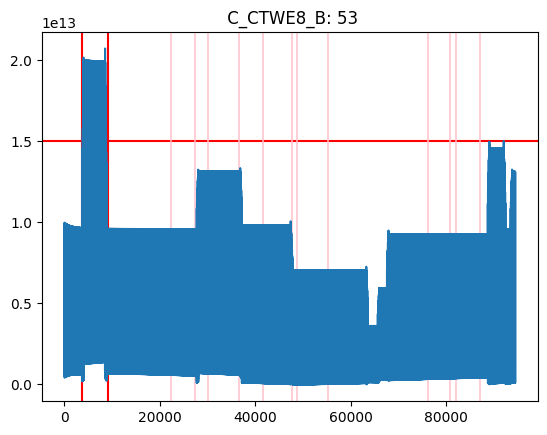

EDD = [151, 152, 153, 154, 190, 191, 192, 193, 194, 195, 229, 230, 231, 232, 233, 234, 235, 236, 268, 269, 270, 271, 272, 273, 274, 275, 276, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 331, 332, 347, 349, 350, 351, 352, 353, 354, 355, 356, 357, 368, 369, 370, 371, 372, 373, 374, 375, 376, 389, 390, 391, 392, 393, 394, 395, 396, 397, 408, 409, 410, 411, 412, 413, 414, 415, 416, 429, 430, 431, 432, 433, 434, 435, 436, 437, 448, 449, 450, 451, 452, 453, 454, 455, 456, 469, 470, 471, 472, 473, 474, 475, 476, 477, 488, 489, 490, 491, 492, 493, 494, 495, 496, 509, 510, 511, 512, 513, 514, 515, 516, 517, 528, 529, 530, 531, 532, 533, 534, 535, 536, 549, 550, 551, 552, 553, 554, 555, 556, 557, 568, 569, 570, 571, 572, 573, 574, 575, 576, 589, 590, 591, 592, 593, 594, 595, 596, 597, 608, 609, 610, 611, 612, 613, 614, 615, 616, 629, 630, 631, 632, 633, 634, 635, 636, 637, 648, 649, 650, 651, 652, 653, 654, 655, 656, 669, 670, 671, 672, 673, 674, 675, 676, 677, 688, 689, 690, 691, 692, 693

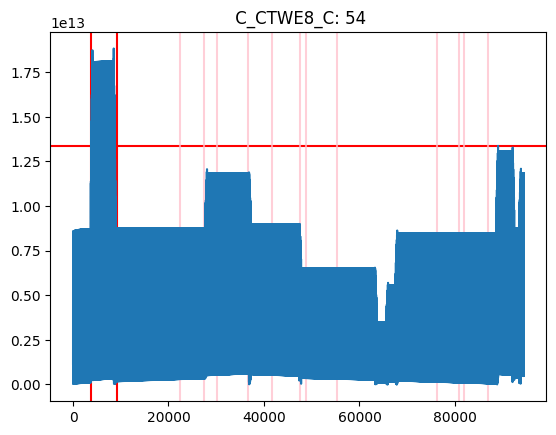

EDD = [137, 138, 139, 140, 141, 177, 178, 179, 180, 181, 215, 216, 217, 218, 219, 220, 221, 222, 255, 256, 257, 258, 259, 260, 261, 262, 263, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 317, 318, 319, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 355, 356, 357, 358, 359, 360, 361, 362, 363, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 395, 396, 397, 398, 399, 400, 401, 402, 403, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 435, 436, 437, 438, 439, 440, 441, 442, 443, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 475, 476, 477, 478, 479, 480, 481, 482, 483, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 515, 516, 517, 518, 519, 520, 521, 522, 523, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 555, 556, 557, 558, 559, 560, 561, 562, 563, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 595, 596, 597, 598, 599, 600, 601, 602, 603, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 635, 636, 637, 638, 639, 640, 641, 642, 643, 655, 656, 657, 658, 659, 660

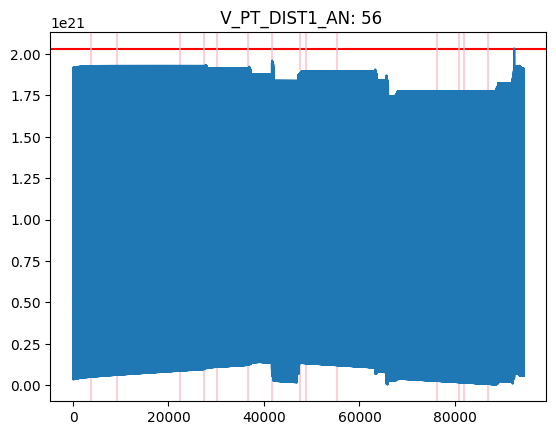

***********************************************************************************************
Sensor: 57  V_PT_DIST1_BN, No Attacks


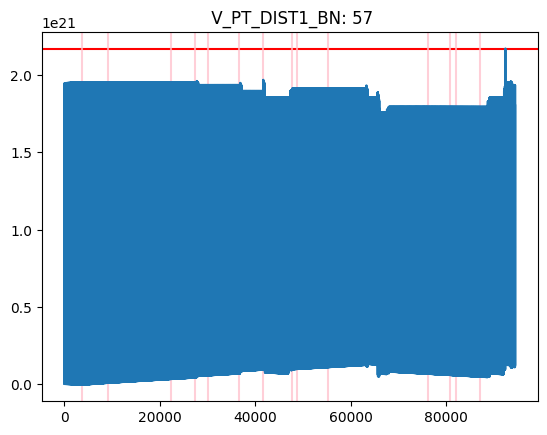

***********************************************************************************************
Sensor: 58  V_PT_DIST1_CN, Attack Type: PT_ratio, Time Attacked: 9.006817s to 9.048484s


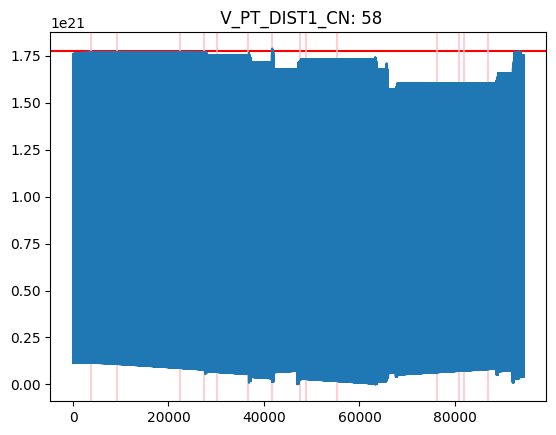

EDD = [137, 138, 139, 140, 141, 177, 178, 179, 180, 181, 215, 216, 217, 218, 219, 220, 221, 222, 255, 256, 257, 258, 259, 260, 261, 262, 263, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 317, 318, 319, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 355, 356, 357, 358, 359, 360, 361, 362, 363, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 395, 396, 397, 398, 399, 400, 401, 402, 403, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 435, 436, 437, 438, 439, 440, 441, 442, 443, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 475, 476, 477, 478, 479, 480, 481, 482, 483, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 515, 516, 517, 518, 519, 520, 521, 522, 523, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 555, 556, 557, 558, 559, 560, 561, 562, 563, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 595, 596, 597, 598, 599, 600, 601, 602, 603, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 635, 636, 637, 638, 639, 640, 641, 642, 643, 655, 656, 657, 658, 659, 660

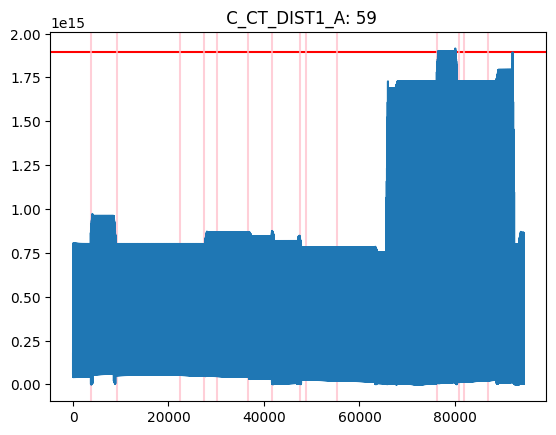

EDD = [137, 138, 139, 140, 141, 177, 178, 179, 180, 181, 215, 216, 217, 218, 219, 220, 221, 222, 255, 256, 257, 258, 259, 260, 261, 262, 263, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 317, 318, 319, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 355, 356, 357, 358, 359, 360, 361, 362, 363, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 395, 396, 397, 398, 399, 400, 401, 402, 403, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 435, 436, 437, 438, 439, 440, 441, 442, 443, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 475, 476, 477, 478, 479, 480, 481, 482, 483, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 515, 516, 517, 518, 519, 520, 521, 522, 523, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 555, 556, 557, 558, 559, 560, 561, 562, 563, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 595, 596, 597, 598, 599, 600, 601, 602, 603, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 635, 636, 637, 638, 639, 640, 641, 642, 643, 655, 656, 657, 658, 659, 660

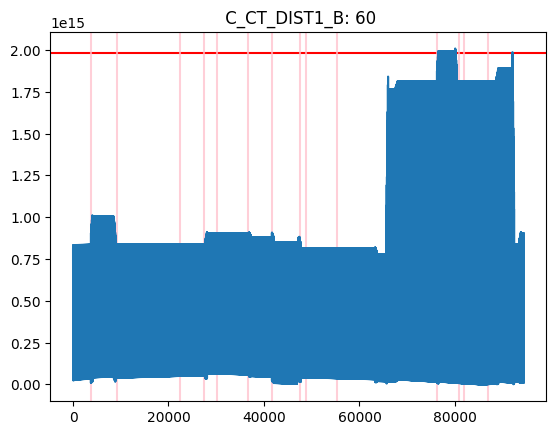

EDD = [137, 138, 139, 140, 141, 177, 178, 179, 180, 181, 215, 216, 217, 218, 219, 220, 221, 222, 255, 256, 257, 258, 259, 260, 261, 262, 263, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 317, 318, 319, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 355, 356, 357, 358, 359, 360, 361, 362, 363, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 395, 396, 397, 398, 399, 400, 401, 402, 403, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 435, 436, 437, 438, 439, 440, 441, 442, 443, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 475, 476, 477, 478, 479, 480, 481, 482, 483, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 515, 516, 517, 518, 519, 520, 521, 522, 523, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 555, 556, 557, 558, 559, 560, 561, 562, 563, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 595, 596, 597, 598, 599, 600, 601, 602, 603, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 635, 636, 637, 638, 639, 640, 641, 642, 643, 655, 656, 657, 658, 659, 660

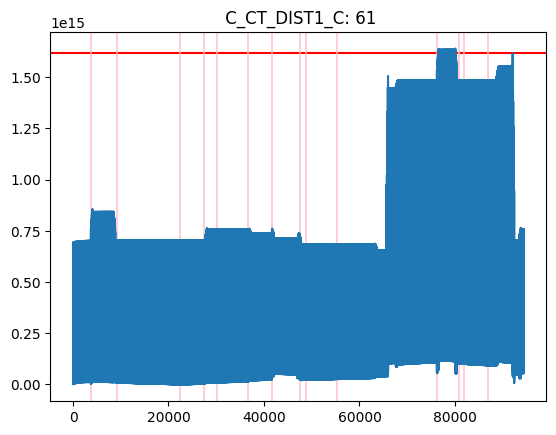

EDD = [137, 138, 139, 140, 141, 177, 178, 179, 180, 181, 215, 216, 217, 218, 219, 220, 221, 222, 255, 256, 257, 258, 259, 260, 261, 262, 263, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 317, 318, 319, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 355, 356, 357, 358, 359, 360, 361, 362, 363, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 395, 396, 397, 398, 399, 400, 401, 402, 403, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 435, 436, 437, 438, 439, 440, 441, 442, 443, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 475, 476, 477, 478, 479, 480, 481, 482, 483, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 515, 516, 517, 518, 519, 520, 521, 522, 523, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 555, 556, 557, 558, 559, 560, 561, 562, 563, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 595, 596, 597, 598, 599, 600, 601, 602, 603, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 635, 636, 637, 638, 639, 640, 641, 642, 643, 655, 656, 657, 658, 659, 660

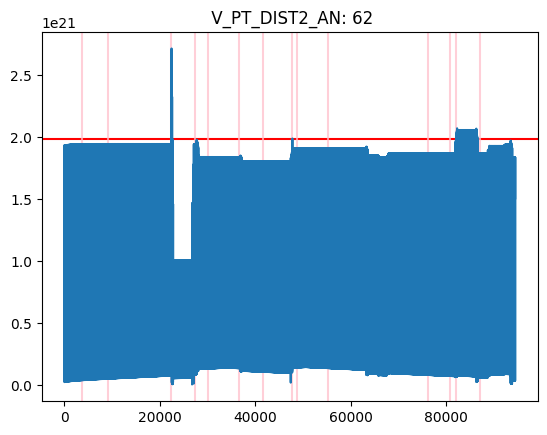

EDD = [137, 138, 139, 140, 141, 177, 178, 179, 180, 181, 215, 216, 217, 218, 219, 220, 221, 222, 255, 256, 257, 258, 259, 260, 261, 262, 263, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 317, 318, 319, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 355, 356, 357, 358, 359, 360, 361, 362, 363, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 395, 396, 397, 398, 399, 400, 401, 402, 403, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 435, 436, 437, 438, 439, 440, 441, 442, 443, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 475, 476, 477, 478, 479, 480, 481, 482, 483, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 515, 516, 517, 518, 519, 520, 521, 522, 523, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 555, 556, 557, 558, 559, 560, 561, 562, 563, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 595, 596, 597, 598, 599, 600, 601, 602, 603, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 635, 636, 637, 638, 639, 640, 641, 642, 643, 655, 656, 657, 658, 659, 660

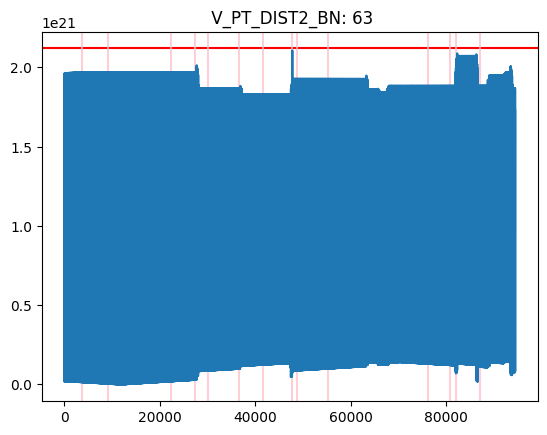

***********************************************************************************************
Sensor: 64  V_PT_DIST2_CN, Attack Type: PT_ratio, Time Attacked: 17.427597s to 18.340091s


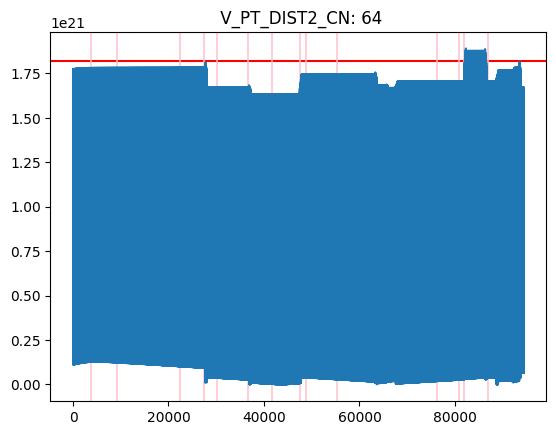

EDD = [137, 138, 139, 140, 141, 177, 178, 179, 180, 181, 215, 216, 217, 218, 219, 220, 221, 222, 255, 256, 257, 258, 259, 260, 261, 262, 263, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 317, 318, 319, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 355, 356, 357, 358, 359, 360, 361, 362, 363, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 395, 396, 397, 398, 399, 400, 401, 402, 403, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 435, 436, 437, 438, 439, 440, 441, 442, 443, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 475, 476, 477, 478, 479, 480, 481, 482, 483, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 515, 516, 517, 518, 519, 520, 521, 522, 523, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 555, 556, 557, 558, 559, 560, 561, 562, 563, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 595, 596, 597, 598, 599, 600, 601, 602, 603, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 635, 636, 637, 638, 639, 640, 641, 642, 643, 655, 656, 657, 658, 659, 660

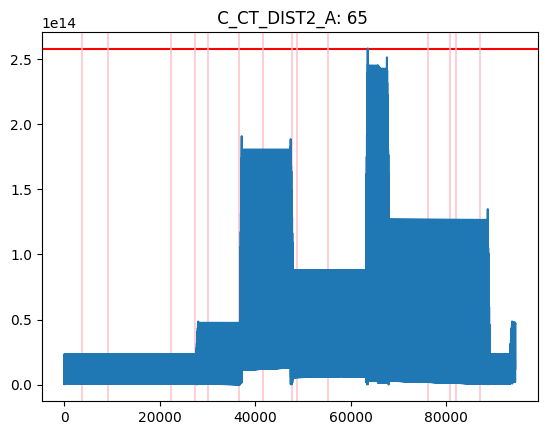

***********************************************************************************************
Sensor: 66  C_CT_DIST2_B, No Attacks


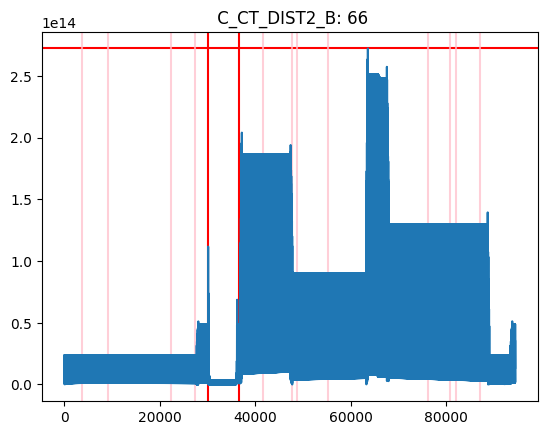

***********************************************************************************************
Sensor: 67  C_CT_DIST2_C, No Attacks


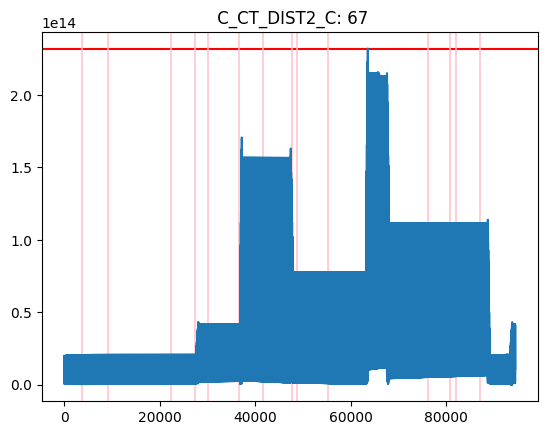

***********************************************************************************************
Sensor: 68  V_PT_FDR3_AN, Attack Type: PT_ratio, Time Attacked: 9.004109s to 19.578833s


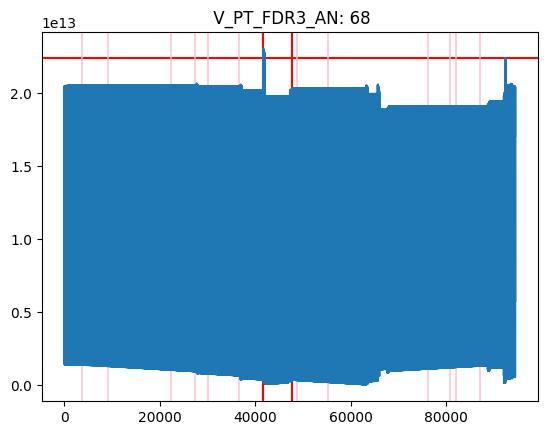

EDD = [19, 58, 59, 60, 99, 138, 139, 140, 219, 220, 299, 300, 50778]
***********************************************************************************************
Sensor: 69  V_PT_FDR3_BN, No Attacks


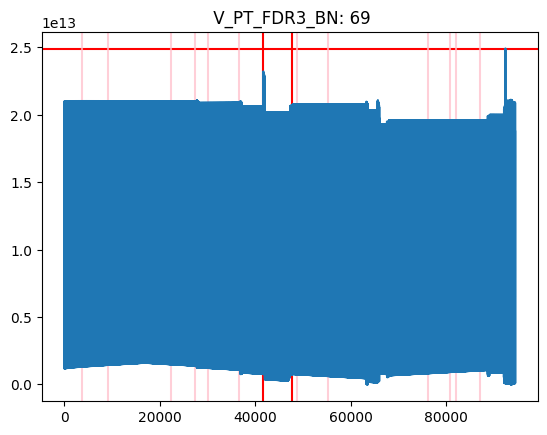

***********************************************************************************************
Sensor: 70  V_PT_FDR3_CN, Attack Type: PT_ratio, Time Attacked: 9.002442s to 9.069734s


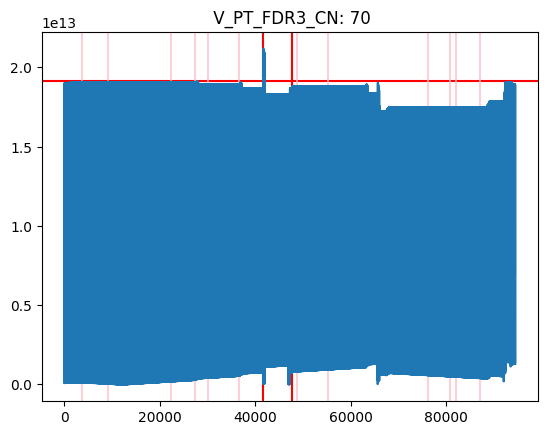

EDD = [11, 12, 13, 14, 15, 31, 32, 33, 34, 35, 51, 52, 53, 54, 55, 70, 71, 72, 73, 74, 75, 92, 93, 94, 111, 112, 113, 114, 115, 131, 132, 133, 134, 135, 150, 151, 152, 153, 154, 155, 172, 173, 174, 191, 192, 193, 194, 195, 211, 212, 213, 214, 215, 230, 231, 232, 233, 234, 235, 252, 253, 254, 271, 272, 273, 274, 275, 291, 292, 293, 294, 295, 311, 312, 313, 314, 315, 332, 333, 334]
***********************************************************************************************
Sensor: 71  C_CT_FDR3_A, Attack Type: CT_ratio, Time Attacked: 16.200521s to 17.071349s


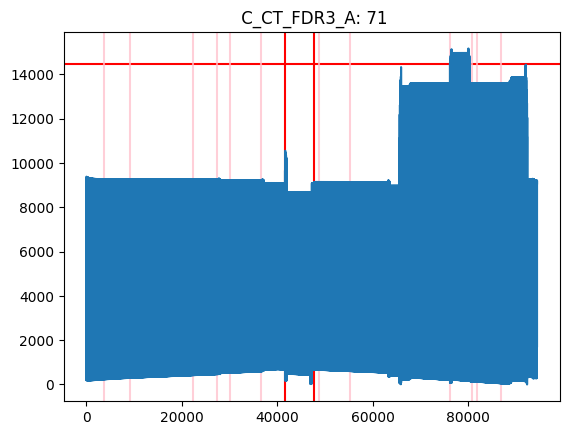

EDD = [34562, 34602, 34641, 34642, 34681, 34682, 34683, 34721, 34722, 34723, 34761, 34762, 34763, 34801, 34802, 34803, 34841, 34842, 34843, 34880, 34881, 34882, 34883, 34921, 34922, 34923, 34941, 34942, 34943, 34961, 34962, 34963, 34981, 34982, 34983, 35001, 35002, 35003, 35021, 35022, 35023, 35041, 35042, 35043, 35061, 35062, 35063, 35081, 35082, 35083, 35101, 35102, 35103, 35121, 35122, 35123, 35141, 35142, 35143, 35161, 35162, 35163, 35181, 35182, 35183, 35201, 35202, 35203, 35221, 35222, 35223, 35241, 35242, 35243, 35261, 35262, 35263, 35281, 35282, 35283, 35301, 35302, 35303, 35321, 35322, 35323, 35341, 35342, 35343, 35361, 35362, 35363, 35381, 35382, 35383, 35401, 35402, 35403, 35421, 35422, 35423, 35441, 35442, 35443, 35461, 35462, 35463, 35481, 35482, 35483, 35501, 35502, 35503, 35521, 35522, 35523, 35541, 35542, 35543, 35561, 35562, 35563, 35581, 35582, 35583, 35601, 35602, 35603, 35621, 35622, 35623, 35641, 35642, 35643, 35661, 35662, 35663, 35681, 35682, 35683, 35701, 35702,

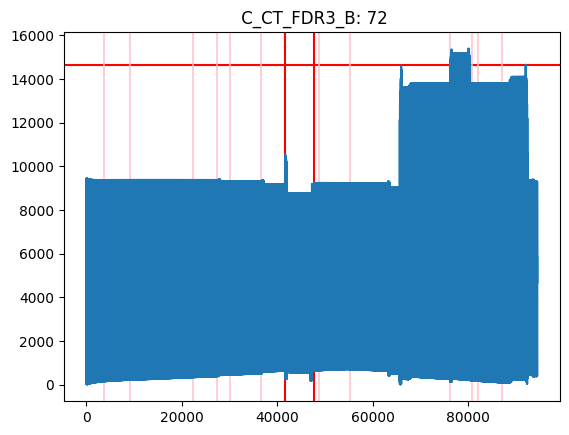

EDD = [34589, 34628, 34629, 34630, 34668, 34669, 34708, 34709, 34710, 34748, 34749, 34750, 34788, 34789, 34790, 34828, 34829, 34830, 34867, 34868, 34869, 34870, 34907, 34908, 34909, 34910, 34928, 34929, 34930, 34948, 34949, 34950, 34968, 34969, 34970, 34988, 34989, 34990, 35008, 35009, 35010, 35028, 35029, 35030, 35048, 35049, 35050, 35068, 35069, 35070, 35088, 35089, 35090, 35108, 35109, 35110, 35128, 35129, 35130, 35148, 35149, 35150, 35168, 35169, 35170, 35188, 35189, 35190, 35208, 35209, 35210, 35228, 35229, 35230, 35248, 35249, 35250, 35268, 35269, 35270, 35288, 35289, 35290, 35308, 35309, 35310, 35328, 35329, 35330, 35348, 35349, 35350, 35368, 35369, 35370, 35388, 35389, 35390, 35408, 35409, 35410, 35428, 35429, 35430, 35448, 35449, 35450, 35468, 35469, 35470, 35488, 35489, 35490, 35508, 35509, 35510, 35528, 35529, 35530, 35548, 35549, 35550, 35568, 35569, 35570, 35588, 35589, 35590, 35608, 35609, 35610, 35628, 35629, 35630, 35648, 35649, 35650, 35668, 35669, 35670, 35688, 35689,

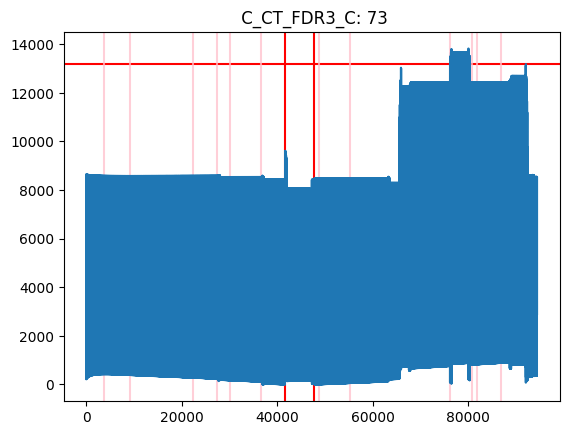

EDD = [34575, 34615, 34616, 34655, 34656, 34694, 34695, 34696, 34734, 34735, 34736, 34774, 34775, 34776, 34777, 34814, 34815, 34816, 34817, 34854, 34855, 34856, 34857, 34894, 34895, 34896, 34897, 34914, 34915, 34916, 34934, 34935, 34936, 34937, 34954, 34955, 34956, 34974, 34975, 34976, 34977, 34994, 34995, 34996, 35014, 35015, 35016, 35017, 35034, 35035, 35036, 35054, 35055, 35056, 35057, 35074, 35075, 35076, 35094, 35095, 35096, 35097, 35114, 35115, 35116, 35134, 35135, 35136, 35137, 35154, 35155, 35156, 35174, 35175, 35176, 35177, 35194, 35195, 35196, 35214, 35215, 35216, 35217, 35234, 35235, 35236, 35254, 35255, 35256, 35257, 35274, 35275, 35276, 35294, 35295, 35296, 35297, 35314, 35315, 35316, 35334, 35335, 35336, 35337, 35354, 35355, 35356, 35374, 35375, 35376, 35377, 35394, 35395, 35396, 35414, 35415, 35416, 35417, 35434, 35435, 35436, 35454, 35455, 35456, 35457, 35474, 35475, 35476, 35494, 35495, 35496, 35497, 35514, 35515, 35516, 35534, 35535, 35536, 35537, 35554, 35555, 35556,

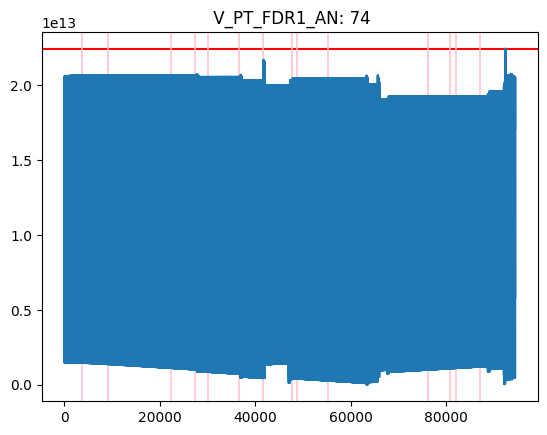

***********************************************************************************************
Sensor: 75  V_PT_FDR1_BN, No Attacks


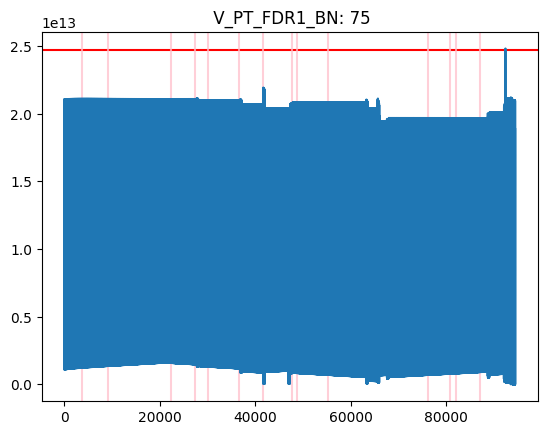

***********************************************************************************************
Sensor: 76  V_PT_FDR1_CN, Attack Type: PT_ratio, Time Attacked: 6.115169s to 9.069525s


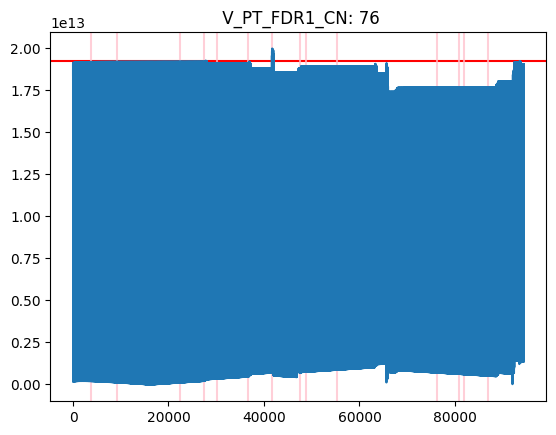

EDD = [34575, 34615, 34616, 34655, 34656, 34694, 34695, 34696, 34734, 34735, 34736, 34774, 34775, 34776, 34777, 34814, 34815, 34816, 34817, 34854, 34855, 34856, 34857, 34894, 34895, 34896, 34897, 34914, 34915, 34916, 34934, 34935, 34936, 34937, 34954, 34955, 34956, 34974, 34975, 34976, 34977, 34994, 34995, 34996, 35014, 35015, 35016, 35017, 35034, 35035, 35036, 35054, 35055, 35056, 35057, 35074, 35075, 35076, 35094, 35095, 35096, 35097, 35114, 35115, 35116, 35134, 35135, 35136, 35137, 35154, 35155, 35156, 35174, 35175, 35176, 35177, 35194, 35195, 35196, 35214, 35215, 35216, 35217, 35234, 35235, 35236, 35254, 35255, 35256, 35257, 35274, 35275, 35276, 35294, 35295, 35296, 35297, 35314, 35315, 35316, 35334, 35335, 35336, 35337, 35354, 35355, 35356, 35374, 35375, 35376, 35377, 35394, 35395, 35396, 35414, 35415, 35416, 35417, 35434, 35435, 35436, 35454, 35455, 35456, 35457, 35474, 35475, 35476, 35494, 35495, 35496, 35497, 35514, 35515, 35516, 35534, 35535, 35536, 35537, 35554, 35555, 35556,

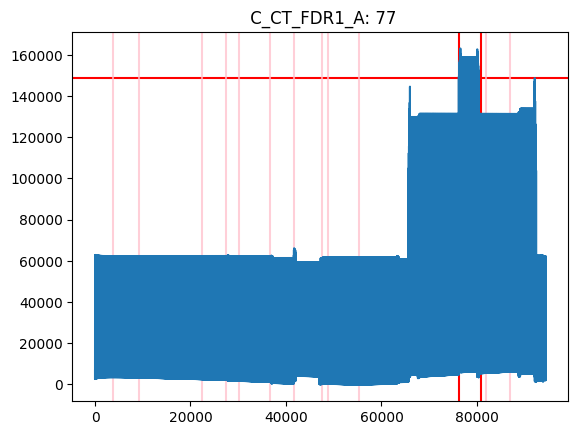

EDD = [1, 41, 42, 80, 81, 82, 120, 121, 122, 159, 160, 161, 162, 163, 199, 200, 201, 202, 203, 239, 240, 241, 242, 243, 279, 280, 281, 282, 283, 319, 320, 321, 322, 323, 360, 361, 362, 363, 379, 380, 381, 382, 383, 400, 401, 402, 403, 419, 420, 421, 422, 423, 440, 441, 442, 443, 459, 460, 461, 462, 463, 480, 481, 482, 483, 499, 500, 501, 502, 503, 520, 521, 522, 523, 539, 540, 541, 542, 543, 560, 561, 562, 563, 579, 580, 581, 582, 583, 600, 601, 602, 603, 619, 620, 621, 622, 623, 640, 641, 642, 643, 659, 660, 661, 662, 663, 680, 681, 682, 683, 699, 700, 701, 702, 703, 720, 721, 722, 723, 739, 740, 741, 742, 743, 760, 761, 762, 763, 779, 780, 781, 782, 783, 800, 801, 802, 803, 819, 820, 821, 822, 823, 840, 841, 842, 843, 859, 860, 861, 862, 863, 880, 881, 882, 883, 899, 900, 901, 902, 903, 920, 921, 922, 923, 939, 940, 941, 942, 943, 960, 961, 962, 963, 979, 980, 981, 982, 983, 1000, 1001, 1002, 1003, 1019, 1020, 1021, 1022, 1023, 1040, 1041, 1042, 1043, 1059, 1060, 1061, 1062, 1063, 10

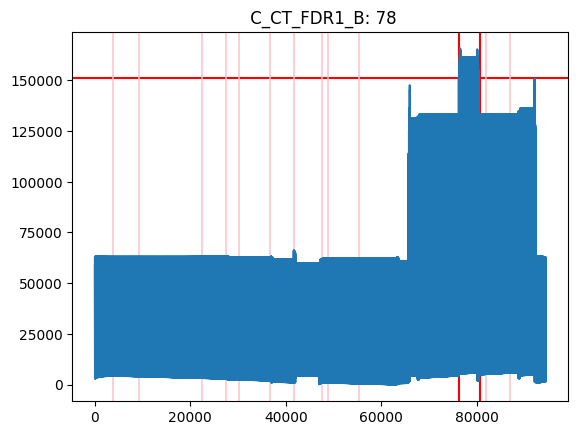

EDD = [67, 68, 69, 107, 108, 109, 146, 147, 148, 149, 150, 187, 188, 189, 226, 227, 228, 229, 230, 266, 267, 268, 269, 270, 306, 307, 308, 309, 310, 346, 347, 348, 349, 350, 366, 367, 368, 369, 370, 387, 388, 389, 390, 406, 407, 408, 409, 410, 427, 428, 429, 430, 446, 447, 448, 449, 450, 467, 468, 469, 470, 486, 487, 488, 489, 490, 507, 508, 509, 510, 526, 527, 528, 529, 530, 547, 548, 549, 550, 566, 567, 568, 569, 570, 587, 588, 589, 590, 606, 607, 608, 609, 610, 627, 628, 629, 630, 646, 647, 648, 649, 650, 667, 668, 669, 670, 686, 687, 688, 689, 690, 707, 708, 709, 710, 726, 727, 728, 729, 730, 747, 748, 749, 750, 766, 767, 768, 769, 770, 787, 788, 789, 790, 806, 807, 808, 809, 810, 827, 828, 829, 830, 846, 847, 848, 849, 850, 867, 868, 869, 870, 886, 887, 888, 889, 890, 907, 908, 909, 910, 926, 927, 928, 929, 930, 947, 948, 949, 950, 966, 967, 968, 969, 970, 987, 988, 989, 990, 1006, 1007, 1008, 1009, 1010, 1027, 1028, 1029, 1030, 1046, 1047, 1048, 1049, 1050, 1067, 1068, 1069, 1070

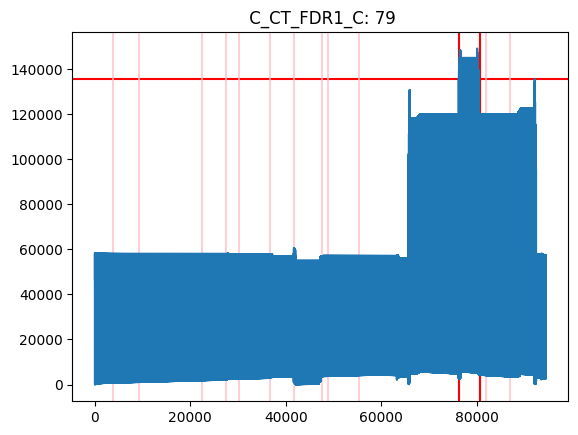

EDD = [14, 15, 53, 54, 55, 56, 93, 94, 95, 96, 133, 134, 135, 136, 173, 174, 175, 176, 213, 214, 215, 216, 253, 254, 255, 256, 257, 292, 293, 294, 295, 296, 297, 332, 333, 334, 335, 336, 337, 353, 354, 355, 356, 373, 374, 375, 376, 377, 393, 394, 395, 396, 413, 414, 415, 416, 417, 433, 434, 435, 436, 453, 454, 455, 456, 457, 473, 474, 475, 476, 493, 494, 495, 496, 497, 513, 514, 515, 516, 533, 534, 535, 536, 537, 553, 554, 555, 556, 573, 574, 575, 576, 577, 593, 594, 595, 596, 613, 614, 615, 616, 617, 633, 634, 635, 636, 653, 654, 655, 656, 657, 673, 674, 675, 676, 693, 694, 695, 696, 697, 713, 714, 715, 716, 733, 734, 735, 736, 737, 753, 754, 755, 756, 773, 774, 775, 776, 777, 793, 794, 795, 796, 813, 814, 815, 816, 817, 833, 834, 835, 836, 853, 854, 855, 856, 857, 873, 874, 875, 876, 893, 894, 895, 896, 897, 913, 914, 915, 916, 933, 934, 935, 936, 937, 953, 954, 955, 956, 973, 974, 975, 976, 977, 993, 994, 995, 996, 1013, 1014, 1015, 1016, 1017, 1033, 1034, 1035, 1036, 1053, 1054, 10

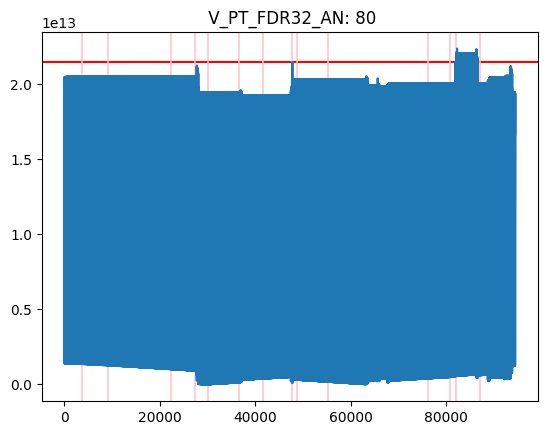

EDD = [14, 15, 53, 54, 55, 56, 93, 94, 95, 96, 133, 134, 135, 136, 173, 174, 175, 176, 213, 214, 215, 216, 253, 254, 255, 256, 257, 292, 293, 294, 295, 296, 297, 332, 333, 334, 335, 336, 337, 353, 354, 355, 356, 373, 374, 375, 376, 377, 393, 394, 395, 396, 413, 414, 415, 416, 417, 433, 434, 435, 436, 453, 454, 455, 456, 457, 473, 474, 475, 476, 493, 494, 495, 496, 497, 513, 514, 515, 516, 533, 534, 535, 536, 537, 553, 554, 555, 556, 573, 574, 575, 576, 577, 593, 594, 595, 596, 613, 614, 615, 616, 617, 633, 634, 635, 636, 653, 654, 655, 656, 657, 673, 674, 675, 676, 693, 694, 695, 696, 697, 713, 714, 715, 716, 733, 734, 735, 736, 737, 753, 754, 755, 756, 773, 774, 775, 776, 777, 793, 794, 795, 796, 813, 814, 815, 816, 817, 833, 834, 835, 836, 853, 854, 855, 856, 857, 873, 874, 875, 876, 893, 894, 895, 896, 897, 913, 914, 915, 916, 933, 934, 935, 936, 937, 953, 954, 955, 956, 973, 974, 975, 976, 977, 993, 994, 995, 996, 1013, 1014, 1015, 1016, 1017, 1033, 1034, 1035, 1036, 1053, 1054, 10

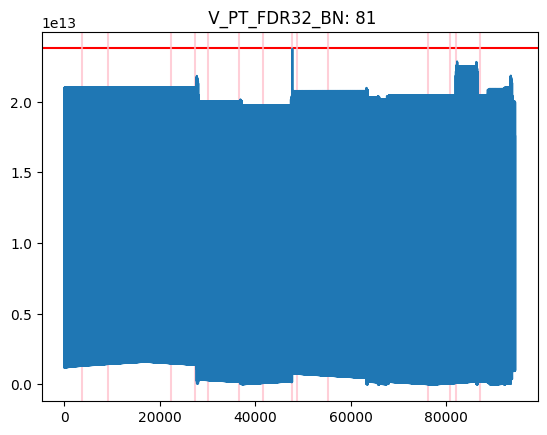

***********************************************************************************************
Sensor: 82  V_PT_FDR32_CN, Attack Type: PT_ratio, Time Attacked: 17.41093s to 18.356966s


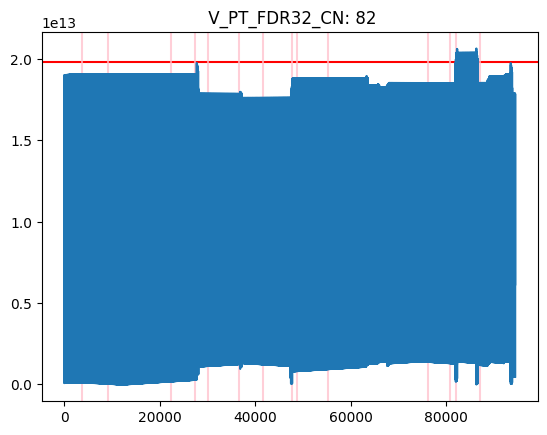

EDD = [14, 15, 53, 54, 55, 56, 93, 94, 95, 96, 133, 134, 135, 136, 173, 174, 175, 176, 213, 214, 215, 216, 253, 254, 255, 256, 257, 292, 293, 294, 295, 296, 297, 332, 333, 334, 335, 336, 337, 353, 354, 355, 356, 373, 374, 375, 376, 377, 393, 394, 395, 396, 413, 414, 415, 416, 417, 433, 434, 435, 436, 453, 454, 455, 456, 457, 473, 474, 475, 476, 493, 494, 495, 496, 497, 513, 514, 515, 516, 533, 534, 535, 536, 537, 553, 554, 555, 556, 573, 574, 575, 576, 577, 593, 594, 595, 596, 613, 614, 615, 616, 617, 633, 634, 635, 636, 653, 654, 655, 656, 657, 673, 674, 675, 676, 693, 694, 695, 696, 697, 713, 714, 715, 716, 733, 734, 735, 736, 737, 753, 754, 755, 756, 773, 774, 775, 776, 777, 793, 794, 795, 796, 813, 814, 815, 816, 817, 833, 834, 835, 836, 853, 854, 855, 856, 857, 873, 874, 875, 876, 893, 894, 895, 896, 897, 913, 914, 915, 916, 933, 934, 935, 936, 937, 953, 954, 955, 956, 973, 974, 975, 976, 977, 993, 994, 995, 996, 1013, 1014, 1015, 1016, 1017, 1033, 1034, 1035, 1036, 1053, 1054, 10

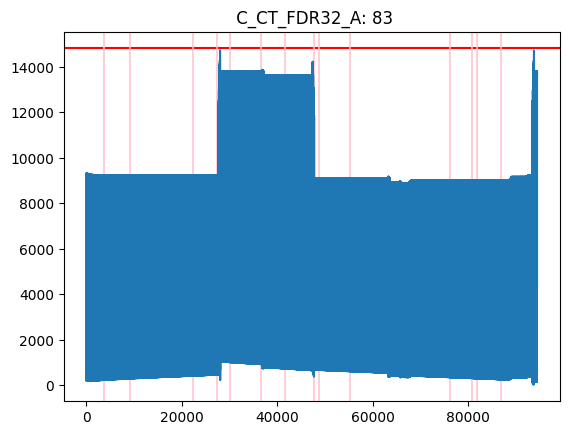

***********************************************************************************************
Sensor: 84  C_CT_FDR32_B, No Attacks


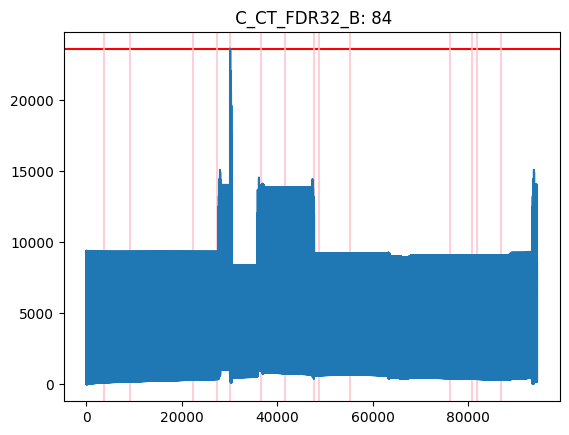

***********************************************************************************************
Sensor: 85  C_CT_FDR32_C, No Attacks


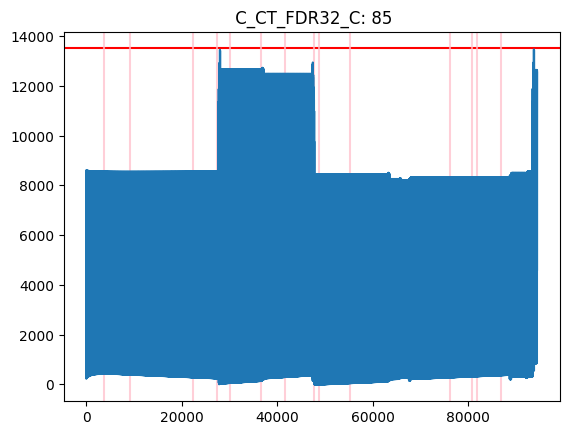

***********************************************************************************************
Sensor: 86  V_PT_FDR12_AN, Attack Type: PT_ratio, Time Attacked: 10.278893s to 18.371132s


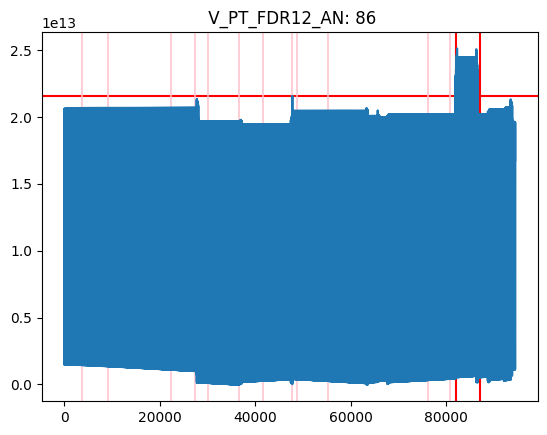

EDD = [-34182, -1, 0, 1, 37, 38, 39, 40, 41, 77, 78, 79, 80, 81, 117, 118, 119, 120, 121, 156, 157, 158, 159, 160, 161, 196, 197, 198, 199, 200, 201, 202, 236, 237, 238, 239, 240, 241, 242, 276, 277, 278, 279, 280, 281, 282, 316, 317, 318, 319, 320, 321, 322, 357, 358, 359, 360, 361, 362, 376, 377, 378, 379, 380, 381, 382, 397, 398, 399, 400, 401, 402, 416, 417, 418, 419, 420, 421, 422, 437, 438, 439, 440, 441, 442, 456, 457, 458, 459, 460, 461, 462, 477, 478, 479, 480, 481, 482, 496, 497, 498, 499, 500, 501, 502, 517, 518, 519, 520, 521, 522, 536, 537, 538, 539, 540, 541, 542, 557, 558, 559, 560, 561, 562, 576, 577, 578, 579, 580, 581, 582, 597, 598, 599, 600, 601, 602, 616, 617, 618, 619, 620, 621, 622, 637, 638, 639, 640, 641, 642, 656, 657, 658, 659, 660, 661, 662, 677, 678, 679, 680, 681, 682, 696, 697, 698, 699, 700, 701, 702, 717, 718, 719, 720, 721, 722, 736, 737, 738, 739, 740, 741, 742, 757, 758, 759, 760, 761, 762, 776, 777, 778, 779, 780, 781, 782, 797, 798, 799, 800, 801, 

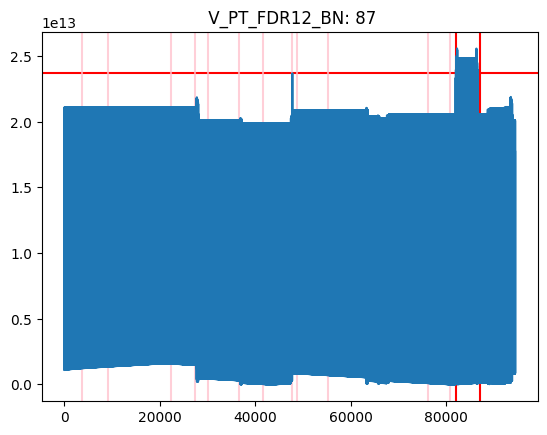

EDD = [65, 66, 106, 145, 146, 147, 185, 186, 187, 224, 225, 226, 227, 264, 265, 266, 267, 304, 305, 306, 307, 308, 344, 345, 346, 347, 348, 364, 365, 366, 367, 385, 386, 387, 388, 404, 405, 406, 407, 425, 426, 427, 428, 444, 445, 446, 447, 465, 466, 467, 468, 484, 485, 486, 487, 505, 506, 507, 508, 524, 525, 526, 527, 545, 546, 547, 548, 564, 565, 566, 567, 585, 586, 587, 588, 604, 605, 606, 607, 625, 626, 627, 628, 644, 645, 646, 647, 665, 666, 667, 668, 684, 685, 686, 687, 705, 706, 707, 708, 724, 725, 726, 727, 745, 746, 747, 748, 764, 765, 766, 767, 785, 786, 787, 788, 804, 805, 806, 807, 825, 826, 827, 828, 844, 845, 846, 847, 865, 866, 867, 868, 884, 885, 886, 887, 905, 906, 907, 908, 924, 925, 926, 927, 945, 946, 947, 948, 964, 965, 966, 967, 985, 986, 987, 988, 1004, 1005, 1006, 1007, 1025, 1026, 1027, 1028, 1044, 1045, 1046, 1047, 1065, 1066, 1067, 1068, 1084, 1085, 1086, 1087, 1105, 1106, 1107, 1108, 1124, 1125, 1126, 1127, 1145, 1146, 1147, 1148, 1164, 1165, 1166, 1167, 1185

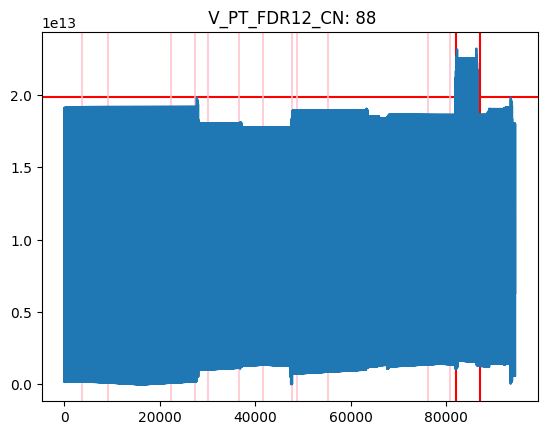

EDD = [10, 11, 12, 13, 14, 50, 51, 52, 53, 54, 90, 91, 92, 93, 94, 95, 130, 131, 132, 133, 134, 135, 170, 171, 172, 173, 174, 175, 209, 210, 211, 212, 213, 214, 215, 249, 250, 251, 252, 253, 254, 255, 289, 290, 291, 292, 293, 294, 295, 329, 330, 331, 332, 333, 334, 335, 350, 351, 352, 353, 354, 355, 370, 371, 372, 373, 374, 375, 390, 391, 392, 393, 394, 395, 410, 411, 412, 413, 414, 415, 430, 431, 432, 433, 434, 435, 450, 451, 452, 453, 454, 455, 470, 471, 472, 473, 474, 475, 490, 491, 492, 493, 494, 495, 510, 511, 512, 513, 514, 515, 530, 531, 532, 533, 534, 535, 550, 551, 552, 553, 554, 555, 570, 571, 572, 573, 574, 575, 590, 591, 592, 593, 594, 595, 610, 611, 612, 613, 614, 615, 630, 631, 632, 633, 634, 635, 650, 651, 652, 653, 654, 655, 670, 671, 672, 673, 674, 675, 690, 691, 692, 693, 694, 695, 710, 711, 712, 713, 714, 715, 730, 731, 732, 733, 734, 735, 750, 751, 752, 753, 754, 755, 770, 771, 772, 773, 774, 775, 790, 791, 792, 793, 794, 795, 810, 811, 812, 813, 814, 815, 830, 831,

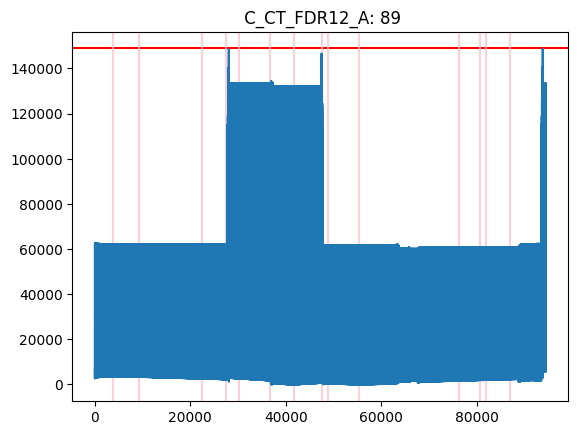

***********************************************************************************************
Sensor: 90  C_CT_FDR12_B, No Attacks


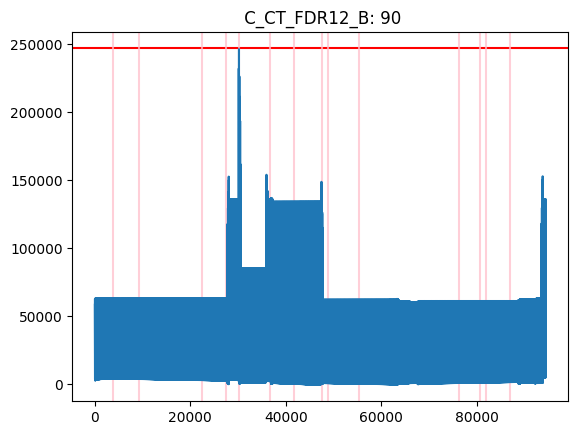

***********************************************************************************************
Sensor: 91  C_CT_FDR12_C, No Attacks


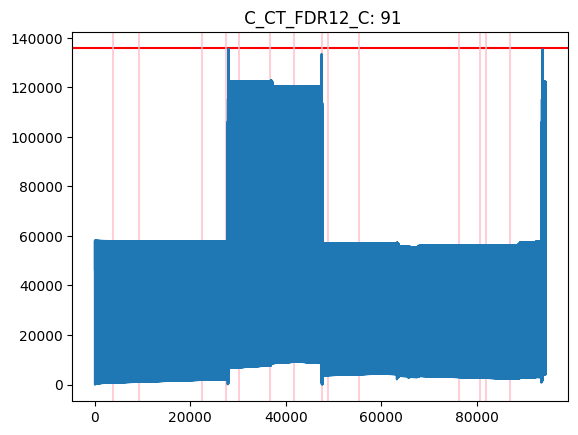

In [18]:
at_sensors = []
at_neighbor = {}
for index, i in enumerate(rsum_list):
    print("***********************************************************************************************")
    attack_in = []
    for indices, j in enumerate(i):
      if j > thresholds[index]:
        attack_in += [indices]
    if len(attack_in) > 3:
      start = (df_test['Time'][attack_in[0]+1201+window+w-1])/1e6
      end = (df_test['Time'][attack_in[-1]+1201+window+w-1])/1e6
      a_type = ""
      if cols[things[index]-1][1] == "C":
        a_type = "CT_ratio"
      elif cols[things[index]-1][1] == "V":
        a_type = "PT_ratio"
      print(f"Sensor: {things[index]} {cols[things[index]-1]}, Attack Type: {a_type}, Time Attacked: {start}s to {end}s")
      at_sensors += [things[index]]
      at_neighbor[things[index]] = attack_in
      atk = True
    else:
      atk = False
      print(f"Sensor: {things[index]} {cols[things[index]-1]}, No Attacks")


    plt.title(f"{cols[things[index]-1]}: {things[index]}")
    plt.axhline(thresholds[index], color='red')


    if things[index] in attack_dict:
      attack_indices = df_test.index[(df_test['Time'] >= attack_dict[things[index]][0] * 1e6) & (df_test['Time'] <= attack_dict[things[index]][1] * 1e6)] - 1201
      for start, end in all_attack_indices:
        if attack_indices[0] == start:
          set_zero = np.zeros(len(data_test)-window-w+1)
          for indices, j in enumerate(i):
            if j > thresholds[index]:
              set_zero[indices]=1
          start_w = start-window-w+1
          end_w = end+window+w-1

          EDD = expectation_detection_delay(set_zero,start_w)
       
          plt.axvline(start_w, color='red')
          plt.axvline(end_w, color='red')
        else:
          start_w = start-window-w+1
          end_w = end+window+w-1
          plt.axvline(start_w, color='pink', alpha=0.75)
          plt.axvline(end_w, color='pink', alpha=0.75)
    else:
       for start, end in all_attack_indices:
          start_w = start-window-w+1
          end_w = end+window+w-1
          plt.axvline(start_w, color='pink', alpha=0.75)
          plt.axvline(end_w, color='pink', alpha=0.75)
    
    plt.plot(i)
    plt.show()
    if atk:
      print(f"EDD = {EDD}")

In [19]:
attack_dict

{52: (1.1, 2.1, 'CT', 'C_CTWE8_A'),
 53: (1.1, 2.1, 'CT', 'C_CTWE8_B'),
 54: (1.1, 2.1, 'CT', 'C_CTWE8_C'),
 55: (1.1, 2.1, 'CT', 'C_CTWE8_N'),
 56: (2.3, 3.0, 'PT', 'V_PT_DIST1_AN'),
 57: (2.3, 3.0, 'PT', 'V_PT_DIST1_BN'),
 58: (2.3, 3.0, 'PT', 'V_PT_DIST1_CN'),
 5: (5.0, 5.9, 'Vphase', 'V_PTWE4_AN'),
 66: (6.6, 7.8, 'Cphase', 'C_CT_DIST2_B'),
 68: (9.0, 10.1, 'GPS', 'V_PT_FDR3_AN'),
 69: (9.0, 10.1, 'GPS', 'V_PT_FDR3_BN'),
 70: (9.0, 10.1, 'GPS', 'V_PT_FDR3_CN'),
 71: (9.0, 10.1, 'GPS', 'C_CT_FDR3_A'),
 72: (9.0, 10.1, 'GPS', 'C_CT_FDR3_B'),
 73: (9.0, 10.1, 'GPS', 'C_CT_FDR3_C'),
 36: (10.5, 11.7, 'GPS', 'C_CTWE2_A'),
 37: (10.5, 11.7, 'GPS', 'C_CTWE2_B'),
 38: (10.5, 11.7, 'GPS', 'C_CTWE2_C'),
 39: (10.5, 11.7, 'GPS', 'C_CTWE2_N'),
 77: (16.2, 17.0, 'CT', 'C_CT_FDR1_A'),
 78: (16.2, 17.0, 'CT', 'C_CT_FDR1_B'),
 79: (16.2, 17.0, 'CT', 'C_CT_FDR1_C'),
 86: (17.4, 18.3, 'PT', 'V_PT_FDR12_AN'),
 87: (17.4, 18.3, 'PT', 'V_PT_FDR12_BN'),
 88: (17.4, 18.3, 'PT', 'V_PT_FDR12_CN')}

In [20]:
order_attack = ['CT', 'Vphase', 'Cphase', 'GPS', 'GPS', 'CT', 'PT']

In [21]:
hops = {}
types = 1.1
for key, value in attack_dict.items():
  if types == value[0]:
    if value[1] not in hops:
      hops[value[1]]= [key]
    else:
      hops[value[1]] += [key]
  else:
    types = value[0]
    hops[value[1]]= [key]

In [22]:
stu = []
for i in hops:
  stu += [i]

In [23]:
hops

{2.1: [52, 53, 54, 55],
 3.0: [56, 57, 58],
 5.9: [5],
 7.8: [66],
 10.1: [68, 69, 70, 71, 72, 73],
 11.7: [36, 37, 38, 39],
 17.0: [77, 78, 79],
 18.3: [86, 87, 88]}

In [24]:
stu

[2.1, 3.0, 5.9, 7.8, 10.1, 11.7, 17.0, 18.3]

In [25]:
hops[5.9]

[5]

In [26]:
at_sensors

[5,
 12,
 19,
 26,
 52,
 53,
 54,
 58,
 59,
 60,
 61,
 62,
 64,
 68,
 70,
 71,
 72,
 73,
 76,
 77,
 78,
 79,
 80,
 82,
 86,
 87,
 88]

In [27]:
for i in at_neighbor:
  print(i)

5
12
19
26
52
53
54
58
59
60
61
62
64
68
70
71
72
73
76
77
78
79
80
82
86
87
88


In [28]:
all_attack_indices

{(4080, 8879),
 (22800, 27119),
 (30480, 36239),
 (42000, 47279),
 (49200, 54959),
 (76560, 80399),
 (82320, 86639)}

In [29]:
all_attack_times

{(1.1, 2.1),
 (2.3, 3.0),
 (5.0, 5.9),
 (6.6, 7.8),
 (9.0, 10.1),
 (10.5, 11.7),
 (16.2, 17.0),
 (17.4, 18.3)}

In [30]:
all_attack_times.remove((2.3, 3.0))
    
all_attack_times

{(1.1, 2.1),
 (5.0, 5.9),
 (6.6, 7.8),
 (9.0, 10.1),
 (10.5, 11.7),
 (16.2, 17.0),
 (17.4, 18.3)}

In [31]:
at_neighbor[68]

[41669,
 41708,
 41709,
 41710,
 41749,
 41788,
 41789,
 41790,
 41869,
 41870,
 41949,
 41950,
 92428]

In [32]:
all_attack_indice = []
for i in all_attack_indices:
  all_attack_indice += [i]
sorted(all_attack_indice)

[(4080, 8879),
 (22800, 27119),
 (30480, 36239),
 (42000, 47279),
 (49200, 54959),
 (76560, 80399),
 (82320, 86639)]

In [33]:
stu.remove(3.0)

In [34]:
n = 0
for start, end in sorted(all_attack_indice):
  attack_list = []
  print("***********************************************************************************************")
  print(f'For the {order_attack[n]} attack starting at index: {start} and ending at index: {end}')

  for key, values in at_neighbor.items():
    for i in values:
      if i+350 > start and i+350 < end:
        if key not in attack_list:
          attack_list += [key]
  print(f'These were the sensors that were detected inside that particular attack interval: {attack_list}')
  for atta in attack_list:
    hop = []
    for j in hops[stu[n]]:
      if j not in emptyr:
        hop += [j]
        hop += adj_list[j]
      else:
        hop +=[j]
    if atta in hop:
      print(f'Attacked has been detected at sensor: {atta}')
    else:
      print(f'{atta} is a False Positive')
  if len(attack_list) > 0:
    print(f'This is the 1-hop neighborhood that we are interested in {sorted(hop)}')
  n += 1

***********************************************************************************************
For the CT attack starting at index: 4080 and ending at index: 8879
These were the sensors that were detected inside that particular attack interval: [52, 53, 54]
Attacked has been detected at sensor: 52
Attacked has been detected at sensor: 53
Attacked has been detected at sensor: 54
This is the 1-hop neighborhood that we are interested in [15, 16, 17, 44, 45, 46, 48, 49, 50, 52, 53, 54, 55, 59, 60, 61]
***********************************************************************************************
For the Vphase attack starting at index: 22800 and ending at index: 27119
These were the sensors that were detected inside that particular attack interval: [5, 12, 19, 26, 62]
Attacked has been detected at sensor: 5
Attacked has been detected at sensor: 12
Attacked has been detected at sensor: 19
Attacked has been detected at sensor: 26
Attacked has been detected at sensor: 62
This is the 1-hop ne

In [35]:
all_attack_indice

[(4080, 8879),
 (30480, 36239),
 (82320, 86639),
 (76560, 80399),
 (49200, 54959),
 (22800, 27119),
 (42000, 47279)]

In [43]:
FPR = []
for sensor, ind in at_neighbor.items():
  for i in ind:
    x = i
    if (x > 4080-350 and x< 8879+350) or (x>30480-350 and x<36239+350) or (x>82320-350 and x<86639+350) or (x>76560-350 and x<80399+350) or (x>49200-350 and x<54959+350) or (x>22800-350 and x<27119+350) or (x>42000-350 and x<47279+350):
      continue
    else:
      print(i)
      print(sensor)
      FPR += [(sensor,i)]


93512
26
92076
52
92063
53
89030
54
92059
60
47788
62
92428
68
92059
72
27802
76
92126
79
47788
80
81969
80
47788
86
81969
86
81970
86


In [44]:
len(FPR)

15

In [45]:
15*208

3120

In [ ]:
at = [62, 64, 80, 82, 86, 87, 88]+[59, 60, 61, 71, 72, 73, 77, 78, 79]+[5, 12, 19, 26, 62]+[52, 53, 54]+[58, 68, 70, 76]
len(at)

In [ ]:
at_neighbor

In [ ]:
at_sensors

In [ ]:
neighbors = []
for i in attack_dict:
  neighbors += [i]
  if i not in [55,39]:
    for j in adj_list[i]:
      neighbors += [j]

In [ ]:
for i in at_sensors:
  if i in neighbors:
    print("Yes")
  else:
    print("Fail")
  

In [ ]:
co = 0
for var1_index, var2_indices in adj_list.items():
    set_zero = np.zeros(len(data_test))
    var1_index -= 1
    var2_indices = np.array(var2_indices) - 1
    violation = []

    for index, i in enumerate(rsum_list[co]):
      if i > thresholds[co]:
        set_zero[index]=1

    plt.plot(set_zero, alpha = 0.5)
    plt.plot(y_true)
    plt.show()
    accuracy, precision, recall, f1= get_scores(y_true, set_zero)
    ARL = average_run_length(set_zero, y_true)

    print(f"{cols[var1_index]} :{var1_index} has accuracy = {accuracy}, precision = {precision}, recall = {recall}, ARL = {ARL} and f1 = {f1}")
    co +=1